In [1]:
!pip install -q \
    AutoRAG==0.3.9 \
    konlpy==0.6.0 \
    langchain==0.3.7 \
    langchain_huggingface==0.1.2 \
    langchain-core==0.3.19 \
    langchain-openai==0.2.8 \
    langchain-community==0.3.7 \
    faiss-cpu==1.9.0 \
    sentence-transformers==3.3.0 \
    bert-score==0.3.13 

# Step 1.  Retrieval

In [73]:
from autorag.parser import Parser


parser = Parser(data_path_glob="./2023 한국 부자 보고서.pdf", project_dir="./parse_project_dir")
parser.start_parsing("./parse_config.yaml")

[11/17/24 15:49:53] INFO     [parser.py:29] >> Parsing Start...                                        ]8;id=617788;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/parser.py\parser.py]8;;\:]8;id=586004;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/parser.py#29\29]8;;\

                    INFO     [base.py:19] >> Running parser - langchain_parse module...                  ]8;id=505951;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/data/parse/base.py\base.py]8;;\:]8;id=438831;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/data/parse/base.py#19\19]8;;\

[11/17/24 15:49:55] INFO     [parser.py:36] >> Parsing Done!                                           ]8;id=134032;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/parser.py\parser.py]8;;\:]8;id=889090;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/parser.py#36\36]8;;\

In [1]:
import pandas as pd
pd.read_parquet("./parse_project_dir/0.parquet")

,texts,path,page,last_modified_datetime
0,,./2023 한국 부자 보고서.pdf,1,2024-11-16
1,2023 한국 부자 보고서Snapshot\n부자 가구의 총자산은 부동산자산 56.2...,./2023 한국 부자 보고서.pdf,2,2024-11-16
2,"부의 원천 중 사업소득 은 전년 대비 감소, \n반면 상속/증여 는 전년 대비 증...",./2023 한국 부자 보고서.pdf,3,2024-11-16
3,2011년 첫 보고서를 시작으로 올해 13번째 발간되는 「2023년 한국 부자 보고...,./2023 한국 부자 보고서.pdf,4,2024-11-16
4,"■ 부자는 부동산투자에서 손실을 경험한 경우가 많았고, 전년 대비 손실 경험이 증가...",./2023 한국 부자 보고서.pdf,5,2024-11-16
...,...,...,...,...
73,"▶ 부동산자산형은 사업체 운영이나 전문직을 가진 부자가, 금융자산형은 사무근로직을...",./2023 한국 부자 보고서.pdf,74,2024-11-16
74,[참고]\n 01 I 용어 정의\n 02 I 연구 방법\n,./2023 한국 부자 보고서.pdf,75,2024-11-16
75,참고1 용어정의 \n● 한국 부자 : 금융자산 10억원 이상 보유하고 거주용 주...,./2023 한국 부자 보고서.pdf,76,2024-11-16
76,"● 부동산자산 유형 \n- 거주용 부동산 : 주택, 아파트, 빌라·연립, 오피스텔...",./2023 한국 부자 보고서.pdf,77,2024-11-16


## Chunking

autorag chunking

In [77]:
from autorag.chunker import Chunker

chunker = Chunker.from_parquet(parsed_data_path="./parse_project_dir/0.parquet", project_dir="./chunk_project_dir")
chunker.start_chunking("./chunk_config.yaml")

[11/17/24 15:51:36] INFO     [chunker.py:44] >> Chunking Start...                                     ]8;id=117604;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/chunker.py\chunker.py]8;;\:]8;id=353894;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/chunker.py#44\44]8;;\

                    INFO     [base.py:22] >> Running chunker - langchain_chunk module...                 ]8;id=376855;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/data/chunk/base.py\base.py]8;;\:]8;id=734547;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/data/chunk/base.py#22\22]8;;\

[11/17/24 15:51:44] WARNING  [base.py:122] >> Created a chunk of size 713, which is longer than the     ]8;id=750307;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/langchain_text_splitters/base.py\base.py]8;;\:]8;id=165136;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/langchain_text_splitters/base.py#122\122]8;;\
                             specified 512                                                                         

[11/17/24 15:51:51] WARNING  [base.py:122] >> Created a chunk of size 584, which is longer than the     ]8;id=974997;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/langchain_text_splitters/base.py\base.py]8;;\:]8;id=388636;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/langchain_text_splitters/base.py#122\122]8;;\
                             specified 512                                                                         

[11/17/24 15:51:58] WARNING  [base.py:122] >> Created a chunk of size 1437, which is longer than the    ]8;id=844754;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/langchain_text_splitters/base.py\base.py]8;;\:]8;id=881802;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/langchain_text_splitters/base.py#122\122]8;;\
                             specified 512                                                                         

[11/17/24 15:51:59] INFO     [chunker.py:51] >> Chunking Done!                                        ]8;id=525831;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/chunker.py\chunker.py]8;;\:]8;id=957708;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/chunker.py#51\51]8;;\

In [2]:
import pandas as pd

df = pd.read_parquet("./chunk_project_dir/0.parquet")
df

,doc_id,contents,path,start_end_idx,metadata
0,2e853192-c470-4df1-bf48-ad4a0700be53,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 2023 한국 부자 보고서...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
1,e5325d5b-7eaa-4756-a936-8fccbc5f0c50,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 부의 원천 중 사업소득 은...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
2,e15bb808-f651-48c3-972f-ad88d2ee6eab,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 2011년 첫 보고서를 시...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
3,a4caa0df-ef99-4f63-909e-128ac6783e54,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 한국 부자 현황 ■ 202...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
4,9b3c074f-3cfb-4f96-aea4-ebdf8bea9725,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 한국 부자의 70.6% 인...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
...,...,...,...,...,...
215,298d209b-2f6b-45c1-b052-f0f406fe745c,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: New Findings T...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
216,335acd4f-8dfc-4fa8-b4a7-d2de6473bb75,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: [ 참고] 01 I 용어 ...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
217,4aaca059-b2b1-4910-a306-659b2dca13f4,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 참고 1 용어정의 ● 한국...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
218,a57c20cf-477c-4b9e-ab78-3a9814ef40b2,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: ● 부동산자산 유형 - 거...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."


## QA Generation

In [1]:
import os
os.environ["OPENAI_API_KEY"] = "your-openai-api-key"

In [4]:
import pandas as pd
from llama_index.llms.openai import OpenAI

from autorag.data.qa.filter.dontknow import dontknow_filter_rule_based
from autorag.data.qa.generation_gt.llama_index_gen_gt import (
    make_basic_gen_gt,
    make_concise_gen_gt,
)
from autorag.data.qa.schema import Raw, Corpus
from autorag.data.qa.query.llama_gen_query import factoid_query_gen
from autorag.data.qa.sample import random_single_hop

[11/18/24 01:16:53] INFO     [__init__.py:100] >> You are using API version of AutoRAG.To use local ]8;id=57286;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/__init__.py\__init__.py]8;;\:]8;id=173031;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/__init__.py#100\100]8;;\
                             version, run pip install 'AutoRAG[gpu]'                                               

                    INFO     [__init__.py:128] >> You are using API version of AutoRAG.To use local ]8;id=137896;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/__init__.py\__init__.py]8;;\:]8;id=303982;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/autorag/__init__.py#128\128]8;;\
                             version, run pip install 'AutoRAG[gpu]'                                               

In [101]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
llm = OpenAI()
raw_df = pd.read_parquet("./parse_project_dir/0.parquet")
raw_instance = Raw(raw_df)

corpus_df = pd.read_parquet("./chunk_project_dir/0.parquet")
corpus_instance = Corpus(corpus_df, raw_instance)

initial_qa = (
    corpus_instance.sample(random_single_hop, n=30)
    .map(
        lambda df: df.reset_index(drop=True),
    )
    .make_retrieval_gt_contents()
    .batch_apply(
        factoid_query_gen,  # query generation
        llm=llm,
         lang="ko",
    )
    .batch_apply(
        make_basic_gen_gt,  # answer generation (basic)
        llm=llm,
         lang="ko",
    )
    .batch_apply(
        make_concise_gen_gt,  # answer generation (concise)
        llm=llm,
         lang="ko",
    )
    .filter(
        dontknow_filter_rule_based,  # filter don't know
        lang="ko",
    )
)

initial_qa.to_parquet('./qa.parquet', './corpus.parquet')

In [5]:
df = pd.read_parquet('./qa.parquet')
df

,qid,query,retrieval_gt,generation_gt
0,1d58e319-319b-4b8f-bc5e-8f181c01111b,부자들이 자산을 늘리는 데 활용한 세 번째 동력은 무엇입니까?,[[6a4f916e-b7bb-4dc1-b3a9-b8e94c5ecf79]],[부자들이 자산을 늘리는 데 활용한 세 번째 동력은 적절한 '자산 배분 전략'입니다...
1,6069c2b2-a22f-4676-8f9e-2746f03b8429,한국 부자 보고서에 따르면 자수성가 형과 금 수저 형의 금융상품 투자 지식은 어떻게...,[[c16a8d2a-a524-46be-9131-1d9701f130f1]],"[한국 부자 보고서에 따르면 자수성가 형은 적극투자형 금융상품 투자 성향이 강하고,..."
2,4ecb5265-da9c-4256-8733-ea2d0813b7ce,부자들은 어떤 종목에 대해 연 40% 이상의 고수익을 기대했습니까?,[[b229284e-50f2-4295-a0b0-dc616b86add6]],"[부자들은 '국내주식'에 대해 연 40% 이상의 고수익을 기대했습니다., 국내주식]"
3,7a4e6000-d7bb-4106-a356-9f4c3f7b5162,자수성가 형과 금 수저 형의 부동산자산평균은 각각 얼마입니까?,[[2521df74-5662-48c8-b72c-11244c761924]],"[자수성가 형의 부동산자산평균은 66억 9천만 원이며, 금 수저 형의 부동산자산평균..."
4,7a153e27-ed86-49dd-bf57-535dc872b98c,자수성가 형이 주로 투자한 금융상품은 무엇입니까?,[[f17225ff-4ad0-4d5a-8e38-30ac4c174466]],"[자수성가 형이 주로 투자한 금융상품은 '주식'입니다., 주식]"
5,fd1d00b9-ed3b-4276-81c0-af25eaee40c3,"한국 부자 보고서에 따르면, 2023년 기준으로 '500 억원 이상'의 총자산을 가...",[[fb294669-26a2-4c0b-85a0-2cb75168262a]],"[한국 부자 보고서에 따르면, 2023년 기준으로 '500 억원 이상'의 총자산을 ..."
6,57eda71b-eb0e-4cd9-b6f3-26524171549d,한국 부자 보고서에서 자산 측면에서 볼 때 부자라고 생각하는 사람들이 자산의 증식과...,[[99089715-90b2-414d-a33e-2febe0b59ee4]],"[조사결과, 자수성가 형에 비해 금 수저 형으로 자산 증식에 관심이 큰 것으로 나타..."
7,ce595580-8976-40f1-bd51-db8f1f9f8c82,2023 한국 부자 보고서에 따르면 금융자산형 부자들이 가장 많이 투자하는 주택은 ...,[[7eb9c1c2-b8df-4168-8597-2c07cd416698]],"[금융자산형 부자들이 가장 많이 투자하는 주택은 ""거주용 주택""입니다., 거주용 주택]"
8,df672c31-1ea1-40dc-b8ab-373b7b8fe889,"부자들이 가장 많이 투자한 기타 자산은 무엇이며, 이에 대한 수익 경험 비중은 얼마...",[[33a5601a-d439-4a64-a74a-315e74b986fa]],"[부자들이 가장 많이 투자한 기타 자산은 '금 ㆍ 보석'이며, 이에 대한 수익 경험..."
9,cc1b3f53-90e8-4ea1-be4c-f39b073d4bd5,"한국 부자 보고서에 따르면, 자수성가 형 부자와 금 수저 형 부자가 과거에 돈을 벌...",[[d90e2245-0e9d-4730-be31-aeb660ea8a39]],"[한국 부자 보고서에 따르면, 자수성가 형 부자와 금 수저 형 부자가 과거에 돈을 ..."


In [19]:
df['query'][0]

'부자들이 자산을 늘리는 데 활용한 세 번째 동력은 무엇입니까?'

In [20]:
df['generation_gt'][0]

array(["부자들이 자산을 늘리는 데 활용한 세 번째 동력은 적절한 '자산 배분 전략'입니다.", '적절한 ‘자산 배분 전략’'],
      dtype=object)

In [21]:
df['query'][1]

'한국 부자 보고서에 따르면 자수성가 형과 금 수저 형의 금융상품 투자 지식은 어떻게 비교되었습니까?'

In [22]:
df['generation_gt'][1]

array(['한국 부자 보고서에 따르면 자수성가 형은 적극투자형 금융상품 투자 성향이 강하고, 금 수저 형은 안정추구형 투자 성향이 강했다고 비교되었습니다.',
       '자수성가 형은 금 수저 형에 비해 투자 지식에 대한 자신감이 높은 것으로 보인다.'], dtype=object)

## Retrieval Performance Evaluation

In [1]:
import pandas as pd
from langchain_community.retrievers import TFIDFRetriever, BM25Retriever
from langchain_community.vectorstores import FAISS
from langchain.schema import Document
from langchain_openai import OpenAIEmbeddings
from langchain_huggingface import HuggingFaceEmbeddings
from typing import List, Dict, Tuple, Union
import torch
import openai

In [2]:
class RetrievalMetrics:
        
    def __init__(self, retrieval_method: str = "tf-idf", df_docs: pd.DataFrame = None, top_k: List[int] = [1, 3, 5, 10], embedding_model_path: str = "nlpai-lab/KoE5"):
        """
        Initializes the RetrievalMetrics class.
        
        Parameters:
        - retrieval_method (str): Retrieval method, supports 'tf-idf', 'bm25', 'dense-openai', or 'dense-huggingface'.
        - df_docs (pd.DataFrame): DataFrame containing documents with columns 'doc_id', 'contents', 'path', 'start_end_idx', and 'metadata'.
        - top_k (List[int]): Default list of top-k values to evaluate metrics.
        - embedding_model_path (str): Embedding model path to use for dense retriever when using 'dense-huggingface'.
        - index_path (str): Path to store/load FAISS index (used only for FAISS-based retrieval).
        """
        self.retrieval_method = retrieval_method
        self.df_docs = df_docs
        self.default_top_k = top_k
        self.retriever = None  # Placeholder for retriever instance
        self.vectorstore = None  # Placeholder for FAISS vectorstore
        self.embedding_model_path = embedding_model_path # Placeholder for embedding model path
        self.retrieval_type = "sparse"


        # Set up embeddings based on the retrieval method
        if self.retrieval_method == "dense-openai":
            self.retrieval_type = "dense"
            self.embeddings = OpenAIEmbeddings()
        elif self.retrieval_method == "dense-huggingface":
            self.retrieval_type = "dense"
            if torch.cuda.is_available():
                device = "cuda"
                print("CUDA is available.")
            else:
                device = "cpu"
            self.embeddings = HuggingFaceEmbeddings(model_name=self.embedding_model_path, model_kwargs={'device':device})

        self.setup_retriever()

    @staticmethod
    def preprocess_contents(contents):
        return contents.replace("파일 제목: 2023 한국 부자 보고서.pdf\n 내용: ", "")

    @staticmethod
    def convert_to_langchain_documents(df_docs):
        documents = []
        for _, row in df_docs.iterrows():
            doc = Document(
                page_content=row['processed_contents'],
                metadata={
                    "doc_id": row['doc_id'],
                    "path": row['path'],
                    "start_end_idx": row['start_end_idx'],
                    "metadata": row['metadata']
                }
            )
            documents.append(doc)
        return documents

    def setup_retriever(self):
        """
        Set up retriever based on the retrieval method.
        """
        
        self.df_docs['processed_contents'] = self.df_docs['contents'].apply(self.preprocess_contents)
        documents = self.convert_to_langchain_documents(self.df_docs)
            
        if self.retrieval_method == "tf-idf":
            self.retriever = TFIDFRetriever.from_documents(documents)
        elif self.retrieval_method == "bm25":
            self.retriever = BM25Retriever.from_documents(documents)
        elif self.retrieval_method == "dense-openai":
            print("Indexing documents using dense-openai...")
            self.vectorstore = FAISS.from_documents(documents, self.embeddings)
            self.retriever = self.vectorstore.as_retriever()
            print("Indexing completed.")
        elif self.retrieval_method == "dense-huggingface":
            print("Indexing documents using dense-huggingface...")
            self.vectorstore = FAISS.from_documents(documents, self.embeddings)
            self.retriever = self.vectorstore.as_retriever()
            print("Indexing completed.")
        else:
            raise ValueError("Invalid retrieval method. Use 'tf-idf', 'bm25', 'dense-openai', or 'dense-huggingface'.")


    def calculate_hit_rate(self, df_qa: pd.DataFrame, top_k: List[int] = None) -> Dict[int, float]:
        top_k = top_k or self.default_top_k  # Use the provided top_k or fall back to default
        total_queries = len(df_qa)
        results_dict = {}
        
        for k in top_k:
            if self.retrieval_type == "sparse":
                self.retriever.k = k
            else:
                self.retriever.search_kwargs = {"k": k}

            hit_num = 0

            for _, row in df_qa.iterrows():
                query = row['query']
                retrieval_gt = set([doc_id for sublist in row['retrieval_gt'] for doc_id in sublist])
                relevant_docs = self.retriever.invoke(query)
                top_k_doc_ids = [doc.metadata["doc_id"] for doc in relevant_docs]

                if len(set(top_k_doc_ids) & retrieval_gt) > 0:
                    hit_num += 1
                
            hit_rate = hit_num / total_queries
                
            results_dict[k] = hit_rate

        return results_dict

        
    def calculate_recall_precision_f1(
        self, df_qa: pd.DataFrame, top_k: List[int] = None
    ) -> Tuple[float, float, float]:
        top_k = top_k or self.default_top_k  # Use the provided top_k or fall back to default

        results_dict = {}
        for k in top_k:
            if self.retrieval_type == "sparse":
                self.retriever.k = k
            else:
                self.retriever.search_kwargs = {"k": k}


            total_recall = 0
            total_precision = 0
            total_queries = len(df_qa)

            for _, row in df_qa.iterrows():
                
                query = row['query']
                retrieval_gt = set([doc_id for sublist in row['retrieval_gt'] for doc_id in sublist])
                relevant_docs = self.retriever.invoke(query)
                top_k_doc_ids = set(doc.metadata["doc_id"] for doc in relevant_docs)

                intersection = top_k_doc_ids & retrieval_gt
                precision = len(intersection) / len(top_k_doc_ids) if len(top_k_doc_ids) > 0 else 0
                recall = len(intersection) / len(retrieval_gt) if len(retrieval_gt) > 0 else 0

                total_precision += precision
                total_recall += recall

            avg_precision = total_precision / total_queries
            avg_recall = total_recall / total_queries

            f1_score = (
                2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
                if (avg_precision + avg_recall) > 0
                else 0
            )

            results_dict[k] = (avg_recall, avg_precision, f1_score)
        
        return results_dict

    def calculate_mrr(self, df_qa: pd.DataFrame, top_k: List[int] = None) -> float:
        top_k = top_k or self.default_top_k
        total_queries = len(df_qa)
        results_dict = {}
        
        for k in top_k:
            if self.retrieval_type == "sparse":
                self.retriever.k = k
            else:
                self.retriever.search_kwargs = {"k": k}
                
            total_mrr = 0.0

            for _, row in df_qa.iterrows():
                query = row['query']
                retrieval_gt = set([doc_id for sublist in row['retrieval_gt'] for doc_id in sublist])
                relevant_docs = self.retriever.invoke(query, top_k=max(top_k))
                top_k_doc_ids = [doc.metadata["doc_id"] for doc in relevant_docs]
                
                reciprocal_rank = 0
                for rank, doc_id in enumerate(top_k_doc_ids, start=1):
                    if doc_id in retrieval_gt:
                        reciprocal_rank = 1 / rank
                        break
                
                total_mrr += reciprocal_rank
            
            mean_reciprocal_rank = total_mrr / total_queries

            results_dict[k] = mean_reciprocal_rank

        return results_dict

    def evaluate(self, df_qa: pd.DataFrame, metric_type: str, top_k: List[int] = None) -> Dict[str, Union[Dict[int, float], Tuple[float, float, float]]]:
        top_k = top_k or self.default_top_k

        if metric_type == "hit_rate":
            return {"hit_rate": self.calculate_hit_rate(df_qa, top_k=top_k)}
        elif metric_type == "recall_precision_f1":
            return {"recall_precision_f1": self.calculate_recall_precision_f1(df_qa, top_k=top_k)}
        elif metric_type == "mrr":
            return {"mrr": self.calculate_mrr(df_qa, top_k=top_k)}
        else:
            raise ValueError("Invalid metric type. Use 'hit_rate', 'recall_precision_f1', or 'mrr'.")


In [3]:
df_docs = pd.read_parquet("./chunk_project_dir/0.parquet")
df_qa = pd.read_parquet('./qa.parquet')

print(f"document 개수: {len(df_docs)}, qa 개수: {len(df_qa)}")

document 개수: 220, qa 개수: 30


In [4]:
import os
os.environ["OPENAI_API_KEY"] = "your-openai-api-key"

In [6]:
tf_idf_metrics = RetrievalMetrics(retrieval_method="tf-idf", df_docs=df_docs)
bm_25_metrics = RetrievalMetrics(retrieval_method="bm25", df_docs=df_docs)

In [7]:
dense_openai_metrics = RetrievalMetrics(retrieval_method="dense-openai", df_docs=df_docs)

Indexing documents using dense-openai...
Indexing completed.


In [8]:
dense_huggingface_metrics = RetrievalMetrics(retrieval_method="dense-huggingface", df_docs=df_docs, embedding_model_path="nlpai-lab/KoE5")

CUDA is available.


2024-11-18 23:16:00.707524: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-18 23:16:00.717750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731939360.727666   97329 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731939360.730720   97329 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 23:16:00.743850: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Indexing documents using dense-huggingface...
Indexing completed.


### Recall, Precision, F1-score

In [21]:
results = tf_idf_metrics.evaluate(df_qa=df_qa, metric_type="recall_precision_f1", top_k=[1, 3, 5, 10])

# TF-IDF Recall, Precision, F1-score Results per Top-k
print("Recall, Precision, F1-score:", results["recall_precision_f1"])

Recall, Precision, F1-score: {1: (0.3, 0.3, 0.3), 3: (0.5666666666666667, 0.18888888888888883, 0.28333333333333327), 5: (0.7, 0.14000000000000004, 0.2333333333333334), 10: (0.8, 0.08000000000000003, 0.1454545454545455)}


In [29]:
results = bm_25_metrics.evaluate(df_qa=df_qa, metric_type="recall_precision_f1", top_k=[1, 3, 5, 10])

# BM25 Recall, Precision, F1-score Results per Top-k
print("Recall, Precision, F1-score:", results["recall_precision_f1"])

Recall, Precision, F1-score: {1: (0.4666666666666667, 0.4666666666666667, 0.4666666666666667), 3: (0.7, 0.23333333333333325, 0.3499999999999999), 5: (0.7333333333333333, 0.1466666666666667, 0.2444444444444445), 10: (0.7333333333333333, 0.07333333333333335, 0.13333333333333336)}


In [6]:
import logging
httpx_logger = logging.getLogger("httpx") # suppress openai.embedidng api call logs
httpx_logger.setLevel(logging.WARNING)

In [36]:
results = dense_openai_metrics.evaluate(df_qa=df_qa, metric_type="recall_precision_f1", top_k=[1, 3, 5, 10])

# Dense (OpenAI) Recall, Precision, F1-score Results
print("Recall, Precision, F1-score:", results)

Recall, Precision, F1-score: {'recall_precision_f1': {1: (0.4, 0.4, 0.4000000000000001), 3: (0.5333333333333333, 0.17777777777777773, 0.2666666666666666), 5: (0.5666666666666667, 0.11333333333333336, 0.1888888888888889), 10: (0.6666666666666666, 0.06666666666666668, 0.12121212121212124)}}


In [37]:
results = dense_huggingface_metrics.evaluate(df_qa, metric_type="recall_precision_f1", top_k=[1, 3, 5, 10])

# Dense (HuggingFace) Recall, Precision, F1-score Results
print("Recall, Precision, F1-score:", results["recall_precision_f1"])

Recall, Precision, F1-score: {1: (0.36666666666666664, 0.36666666666666664, 0.36666666666666664), 3: (0.7, 0.23333333333333325, 0.3499999999999999), 5: (0.7666666666666667, 0.15333333333333338, 0.2555555555555556), 10: (0.8333333333333334, 0.08333333333333336, 0.15151515151515155)}


### Hit율

In [38]:
results = tf_idf_metrics.evaluate(df_qa, metric_type="hit_rate", top_k=[1, 3, 5, 10])

# TF-IDF Hit Rate Results
print("Hit Rate:", results["hit_rate"])

Hit Rate: {1: 0.3, 3: 0.5666666666666667, 5: 0.7, 10: 0.8}


In [39]:
results = bm_25_metrics.evaluate(df_qa, metric_type="hit_rate", top_k=[1, 3, 5, 10])

# BM25 Hit Rate Results
print("Hit Rate:", results["hit_rate"])

Hit Rate: {1: 0.4666666666666667, 3: 0.7, 5: 0.7333333333333333, 10: 0.7333333333333333}


In [40]:
results = dense_openai_metrics.evaluate(df_qa, metric_type="hit_rate", top_k=[1, 3, 5, 10])

# Dense (OpenAI) Hit Rate Results
print("Hit Rate:", results["hit_rate"])

Hit Rate: {1: 0.4, 3: 0.5333333333333333, 5: 0.5666666666666667, 10: 0.6666666666666666}


In [41]:
results = dense_huggingface_metrics.evaluate(df_qa, metric_type="hit_rate", top_k=[1, 3, 5, 10])

# Dense (HuggingFace) Hit Rate Results
print("Hit Rate:", results["hit_rate"])

Hit Rate: {1: 0.36666666666666664, 3: 0.7, 5: 0.7666666666666667, 10: 0.8333333333333334}


### MRR(Mean Reciprocal Rank)

In [42]:
results = tf_idf_metrics.evaluate(df_qa, metric_type="mrr", top_k=[1, 3, 5, 10])

# TF-IDF MRR Results
print("MRR:", results["mrr"])

MRR: {1: 0.3, 3: 0.4277777777777778, 5: 0.4577777777777778, 10: 0.4736507936507936}


In [43]:
results = bm_25_metrics.evaluate(df_qa, metric_type="mrr", top_k=[1, 3, 5, 10])

# BM25 MRR Results
print("MRR:", results["mrr"])

MRR: {1: 0.4666666666666667, 3: 0.5722222222222222, 5: 0.5788888888888888, 10: 0.5788888888888888}


In [44]:
results = dense_openai_metrics.evaluate(df_qa, metric_type="mrr", top_k=[1, 3, 5, 10])

# Dense (OpenAI) MRR Results
print("MRR:", results["mrr"])

MRR: {1: 0.4, 3: 0.4666666666666667, 5: 0.475, 10: 0.4862037037037037}


In [45]:
results = dense_huggingface_metrics.evaluate(df_qa, metric_type="mrr", top_k=[1, 3, 5, 10])

# Dense (HuggingFace) MRR Results
print("MRR:", results["mrr"])

MRR: {1: 0.36666666666666664, 3: 0.5000000000000001, 5: 0.5166666666666667, 10: 0.525925925925926}


### nDCG(normalized Discounted Cumulated Gain)

nDCG(normalized Discounted Cumulated Gain)을 계산하기 위해서는 ,각 Qeury에 대한 모든 Document의 연관성 점수를 라벨링해야합니다.

즉, 현재 Query는 30개, Document는 220개이므로 660개에 해당하는 라벨링을 정성적으로 진행해야 합니다.\
이는 너무 많은 시간이 소요되기 때문에 이론상 어떻게 결과를 얻어볼 수 있는지를 설명하겠습니다.


1. 각 Qeury에 대한 모든 Document의 연관성 점수를 라벨링 합니다. (높을 수록 연관성이 높음)
2. 각 Query당 뽑을 Document개수 top_k를 정합니다.
3. Query 별로 top_k에 따른 IDCG(Ideal Discounted Cumulated Gain)를 구합니다. 
4. Query에 대해 retriever가 뽑은 top_k개의 document에 대해 DCG(Discounted Cumulated Gain)를 구하고, 해당 Query의 IDCG로 나누면 nDCG를 구할 수 있습니다.

### Visualization

In [28]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm
from collections import defaultdict

metric_types = ["hit_rate", "recall_precision_f1", "mrr"]
retrieval_methods = ["tf-idf", "bm25", "dense-openai", "dense-huggingface"]
top_k = [1, 3, 5, 10]

results_dict = defaultdict(dict)


for retrieval_method in tqdm(retrieval_methods, desc="Retrieval Methods", total=len(retrieval_methods), position=0):
    results_dict[retrieval_method] = {}
    metrics = RetrievalMetrics(retrieval_method=retrieval_method, df_docs=df_docs)
    for metric_type in tqdm(metric_types, desc="Metric Types", total=len(metric_types), position=1):
        results_dict[retrieval_method].update(metrics.evaluate(df_qa, metric_type, top_k))

Retrieval Methods:  50%|█████     | 2/4 [00:00<00:00,  5.29it/s]

Indexing documents using dense-openai...
Indexing completed.


Retrieval Methods:  75%|███████▌  | 3/4 [02:20<01:04, 64.30s/it]

CUDA is available.
Indexing documents using dense-huggingface...
Indexing completed.


Retrieval Methods: 100%|██████████| 4/4 [02:34<00:00, 38.64s/it]


In [29]:
results_dict

defaultdict(dict,
            {'tf-idf': {'hit_rate': {1: 0.3,
               3: 0.5666666666666667,
               5: 0.7,
               10: 0.8},
              'recall_precision_f1': {1: (0.3, 0.3, 0.3),
               3: (0.5666666666666667,
                0.18888888888888883,
                0.28333333333333327),
               5: (0.7, 0.14000000000000004, 0.2333333333333334),
               10: (0.8, 0.08000000000000003, 0.1454545454545455)},
              'mrr': {1: 0.3,
               3: 0.4277777777777778,
               5: 0.4577777777777778,
               10: 0.4736507936507936}},
             'bm25': {'hit_rate': {1: 0.4666666666666667,
               3: 0.7,
               5: 0.7333333333333333,
               10: 0.7333333333333333},
              'recall_precision_f1': {1: (0.4666666666666667,
                0.4666666666666667,
                0.4666666666666667),
               3: (0.7, 0.23333333333333325, 0.3499999999999999),
               5: (0.7333333333333333,

In [82]:
# Split recall_precision_f1 into recall, precision, and f1-score

def split_recall_precision_f1(results_dict):
    top_k = ['1', '3', '5', '10']
    for key in results_dict.keys():
        results_dict[key]['precision'] = {str(k) : results_dict[key]['recall_precision_f1'][k][1] for k in top_k}
        results_dict[key]['recall'] = {str(k) : results_dict[key]['recall_precision_f1'][k][0] for k in top_k}
        results_dict[key]['f1'] = {str(k) : results_dict[key]['recall_precision_f1'][k][2] for k in top_k}
        results_dict[key].pop('recall_precision_f1')
    return results_dict

results_dict = split_recall_precision_f1(results_dict)

In [79]:
results_dict

{'tf-idf': {'hit_rate': {'1': 0.3,
   '3': 0.5666666666666667,
   '5': 0.7,
   '10': 0.8},
  'mrr': {'1': 0.3,
   '3': 0.4277777777777778,
   '5': 0.4577777777777778,
   '10': 0.4736507936507936},
  'precision': {'1': 0.3,
   '3': 0.18888888888888883,
   '5': 0.14000000000000004,
   '10': 0.08000000000000003},
  'recall': {'1': 0.3, '3': 0.5666666666666667, '5': 0.7, '10': 0.8},
  'f1': {'1': 0.3,
   '3': 0.28333333333333327,
   '5': 0.2333333333333334,
   '10': 0.1454545454545455}},
 'bm25': {'hit_rate': {'1': 0.4666666666666667,
   '3': 0.7,
   '5': 0.7333333333333333,
   '10': 0.7333333333333333},
  'mrr': {'1': 0.4666666666666667,
   '3': 0.5722222222222222,
   '5': 0.5788888888888888,
   '10': 0.5788888888888888},
  'precision': {'1': 0.4666666666666667,
   '3': 0.23333333333333325,
   '5': 0.1466666666666667,
   '10': 0.07333333333333335},
  'recall': {'1': 0.4666666666666667,
   '3': 0.7,
   '5': 0.7333333333333333,
   '10': 0.7333333333333333},
  'f1': {'1': 0.4666666666666667,

In [81]:
# # save results
# import json

# with open("base_retriever_performance_results.json", "w") as f:
#     json.dump(results_dict, f)

In [35]:
# load results
import json

with open("base_retriever_performance_results.json", "r") as f:
    results_dict = json.load(f)

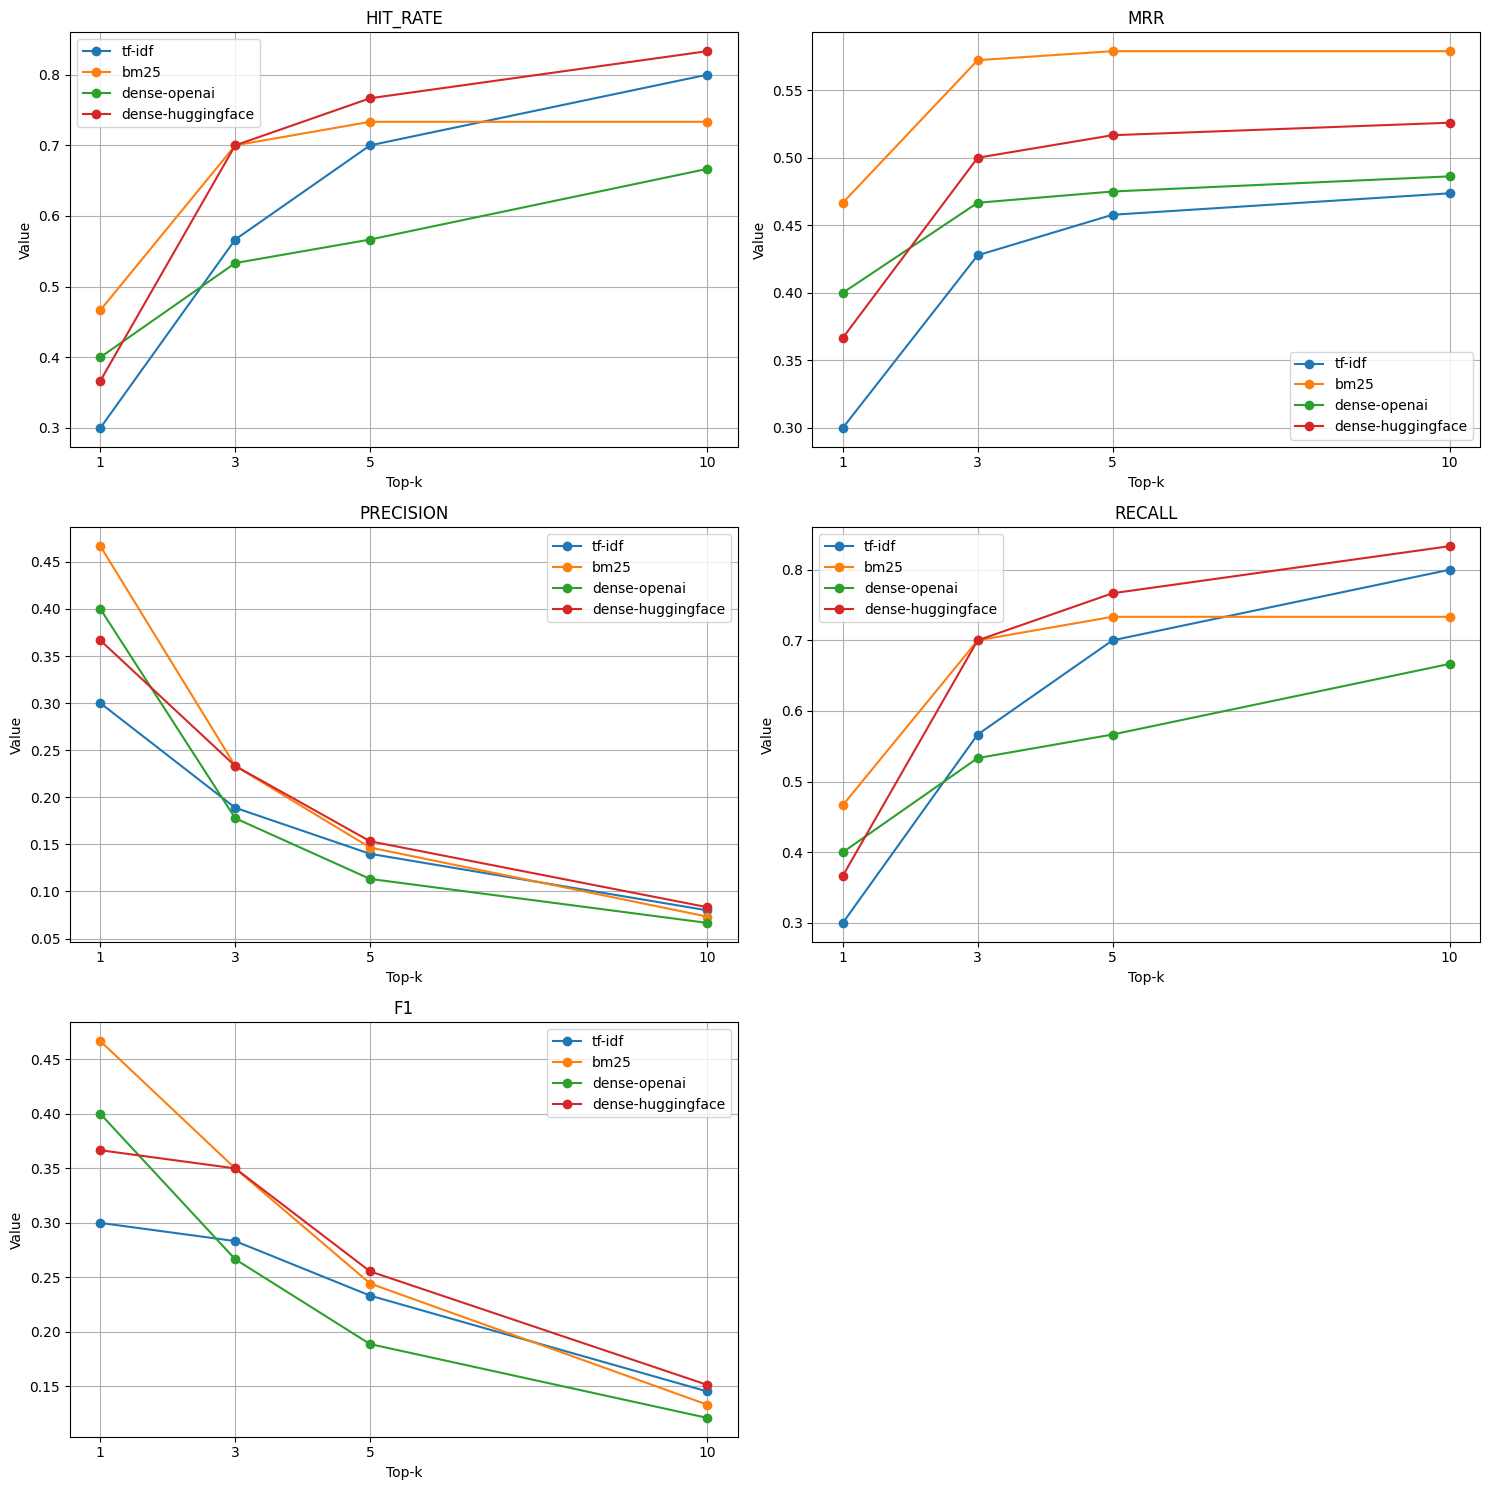

In [37]:
import matplotlib.pyplot as plt
import numpy as np


metrics = ['hit_rate', 'mrr', 'precision', 'recall', 'f1']
methods = results_dict.keys()
x_values = list(map(int, results_dict['tf-idf']['hit_rate'].keys()))

# 그래프 그리기
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    for method in methods:
        y_values = list(results_dict[method][metric].values())
        ax.plot(x_values, y_values, marker='o', label=method)
    
    ax.set_title(metric.upper())
    ax.set_xlabel('Top-k')
    ax.set_xticks(x_values)
    ax.set_ylabel('Value')

    ax.legend()
    ax.grid(True)

# 마지막 빈 subplot 숨기기
axes[-1].axis('off')

plt.tight_layout()
plt.show()



<br/>

<br/>

# Generation Step

## Base Rag Pipline 

In [6]:
from langchain_openai import ChatOpenAI

In [7]:
class RagPipeline:
    def __init__(self, retrieval_metrics: RetrievalMetrics, llm: ChatOpenAI):
        """
        Initializes the EnhancedRetrievalQA class with a retrieval method and an LLM.

        Parameters:
        - retrieval_metrics (RetrievalMetrics): Instance of the RetrievalMetrics class.
        - llm (ChatOpenAI): Language model instance for generating answers.
        """
        self.retrieval_metrics = retrieval_metrics
        self.llm = llm

    def create_prompt(self, query: str, top_k_docs: List[dict]) -> str:
        """
        Creates a prompt using the retrieved top-k documents and the user query.
        
        Parameters:
        - query (str): The user query to answer.
        - top_k_docs (List[dict]): The top-k most relevant documents retrieved by the retriever.

        Returns:
        - str: The formatted prompt to be sent to the LLM.
        """
        # Join the top_k documents content for the prompt
        documents = "\n".join([doc.page_content for doc in top_k_docs])
        relevant_doc_ids = [doc.metadata["doc_id"] for doc in top_k_docs]

        prompt = f"""
        다음 문서들을 바탕으로 주어진 질문에 답해주세요.

        주어진 문서들:
        {documents}

        질문: {query}

        답변:
        """

        return prompt, relevant_doc_ids

    def answer_query(self, query: str, top_k: int = 3) -> str:
        """
        Answers the query using the retriever and language model.

        Parameters:
        - query (str): The user query.
        - top_k (int): Number of top-k relevant documents to retrieve.

        Returns:
        - str: The generated answer.
        """
        # Retrieve top-k relevant documents
        if self.retrieval_metrics.retrieval_type == "sparse":
            self.retrieval_metrics.retriever.k = top_k
        else:
            self.retrieval_metrics.retriever.search_kwargs = {"k": top_k}
        
        relevant_docs = self.retrieval_metrics.retriever.invoke(query)
        
        # Create the prompt based on the retrieved documents
        prompt, relevant_doc_ids = self.create_prompt(query, relevant_docs)
        
        # Get the answer from the language model using the prompt
        response = self.llm.invoke(prompt)
        return response.content, relevant_doc_ids


In [8]:
import os
os.environ["OPENAI_API_KEY"] = "your-openai-api-key"

In [9]:
llm = ChatOpenAI(model = "gpt-4o-mini", temperature = 0.5, max_tokens = 100)

In [17]:
# 기존에 생성한 retriever를 사용합니다.
tf_idf_rag_pipeline = RagPipeline(retrieval_metrics=tf_idf_metrics, llm=llm)
bm_25_rag_pipeline = RagPipeline(retrieval_metrics=bm_25_metrics, llm=llm)
dense_openai_rag_pipeline = RagPipeline(retrieval_metrics=dense_openai_metrics, llm=llm)
dense_huggingface_rag_pipeline = RagPipeline(retrieval_metrics=dense_huggingface_metrics, llm=llm)

In [26]:
query_sample = df_qa['query'][0]
query_sample

'부자들이 자산을 늘리는 데 활용한 세 번째 동력은 무엇입니까?'

In [27]:
answer_sample = df_qa['generation_gt'][0]
answer_sample

array(["부자들이 자산을 늘리는 데 활용한 세 번째 동력은 적절한 '자산 배분 전략'입니다.", '적절한 ‘자산 배분 전략’'],
      dtype=object)

In [41]:
query = query_sample

answer, relevant_doc_ids = tf_idf_rag_pipeline.answer_query(query, top_k=2)
print(answer)

[11/18/24 01:25:25] INFO     [_client.py:1038] >> HTTP Request: POST                                ]8;id=470738;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/httpx/_client.py\_client.py]8;;\:]8;id=327784;file:///home/donghae/anaconda3/envs/langchain/lib/python3.10/site-packages/httpx/_client.py#1038\1038]8;;\
                             https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"                          

부자들이 자산을 늘리는 데 활용한 세 번째 동력은 '자산 배분 전략'입니다.


### Generation Evaluation

#### N-gram Based BLEURT, ROUGE, METEOR

In [9]:
import evaluate
from nltk.translate.meteor_score import meteor_score
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
import nltk
from konlpy.tag import Okt
from collections import defaultdict
import numpy as np
from tqdm import tqdm
nltk.download('wordnet')

2024-11-19 20:05:11.275799: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-19 20:05:11.393571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732014311.441867    1135 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732014311.456612    1135 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-19 20:05:11.571841: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

True

In [10]:
bert_score = evaluate.load('bertscore')

In [11]:
okt = Okt()
text = '날씨는 좋고 할일은 많고 어우 연휴 끝났다'
print(okt.morphs(text))

['날씨', '는', '좋고', '할', '일', '은', '많고', '어우', '연휴', '끝났다']


In [12]:
# Custom tokenizer using Okt
class custom_tokenizer():
    @staticmethod
    def tokenize(text):
        okt = Okt()
        return okt.morphs(text)


class GenerationMetrics:
    def __init__(self, df_qa: pd.DataFrame = None, llm: ChatOpenAI = None, retrieval_metrics: RetrievalMetrics = None, top_k: int = 3):
        """
        Initializes the GenerationMetrics class for evaluating text generation.
        Supports BLEU, ROUGE, METEOR, and BERTScore metrics.

        Parameters:
        - df_qa (pd.DataFrame): DataFrame containing QA pairs.
        - llm (ChatOpenAI): Language model instance for generating answers.
        - retrieval_metrics (RetrievalMetrics): Instance of the RetrievalMetrics class.
        - top_k (int): Number of top-k relevant documents to retrieve.
        """

        self.df_qa = df_qa
        self.llm = llm
        self.retrieval_metrics = retrieval_metrics
        self.top_k = top_k
        try:
            self.results_dict = self.setup_references_hypotheses(self.df_qa, self.llm, self.retrieval_metrics, self.top_k)
        except:
            self.results_dict = None

    @staticmethod
    def calculate_bleu(references: List[str], hypotheses: List[str]) -> float:
        """
        Calculate BLEU score.

        Parameters:
        - references (List[str]): A list of reference texts.
        - hypotheses (List[str]): A list of generated texts.

        Returns:
        - float: BLEU score.
        """
        # Tokenize each sentence using Okt (Korean)
        references_tokenized = [[okt.morphs(ref)] for ref in references]
        hypothese_tokenized = [okt.morphs(hypothese) for hypothese in hypotheses]

        # Calculate BLEU scores for each sentence (1-gram)
        bleu_scores = {"1_gram": [], "2_gram": [], "3_gram": [], "4_gram": []}
        for reference, candidate in zip(references_tokenized, hypothese_tokenized):
            score_1gram = sentence_bleu(reference, candidate, weights=(1, 0, 0, 0))  # 1-gram BLEU score
            score_2gram = sentence_bleu(reference, candidate, weights=(0, 1, 0, 0))  # 2-gram BLEU score
            score_3gram = sentence_bleu(reference, candidate, weights=(0, 0, 1, 0))  # 3-gram BLEU score
            score_4gram = sentence_bleu(reference, candidate, weights=(0, 0, 0, 1))  # 4-gram BLEU score
            
            bleu_scores["1_gram"].append(score_1gram)
            bleu_scores["2_gram"].append(score_2gram)
            bleu_scores["3_gram"].append(score_3gram)
            bleu_scores["4_gram"].append(score_4gram)

        # Calculate average BLEU score per n-gram
        average_bleu = {
            "1_gram": np.mean(bleu_scores["1_gram"]),
            "2_gram": np.mean(bleu_scores["2_gram"]),
            "3_gram": np.mean(bleu_scores["3_gram"]),
            "4_gram": np.mean(bleu_scores["4_gram"])
        }

        return average_bleu

    @staticmethod
    def calculate_rouge(references: List[str], hypotheses: List[str]) -> Dict[str, float]:
        """
        Calculate ROUGE scores.

        Parameters:
        - references (List[str]): A list of reference texts.
        - hypotheses (List[str]): A list of generated texts.

        Returns:
        - Dict[str, float]: ROUGE-1, ROUGE-2, and ROUGE-L F1 scores.
        """
        scores_dict = {"rouge1": [], "rouge2": [], "rougeL": []}

        # instantiate ROUGE scorer with custom tokenizer
        scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], tokenizer=custom_tokenizer)

        # Calculate ROUGE scores for each sentence 
        for ref, hyp in zip(references, hypotheses):
            scores = scorer.score(ref, hyp)
            scores_dict["rouge1"].append(scores["rouge1"].fmeasure)
            scores_dict["rouge2"].append(scores["rouge2"].fmeasure)
            scores_dict["rougeL"].append(scores["rougeL"].fmeasure)
            
        # Calculate average ROUGE scores
        scores_dict = {key: np.mean(value) for key, value in scores_dict.items()}

        return scores_dict

    @staticmethod
    def calculate_meteor(references: List[List[str]], hypotheses: List[str]) -> float:
        """
        Calculate METEOR score.

        Parameters:
        - references (List[str]): A list of reference texts, each containing a list of strings (one or more references per hypothesis).
        - hypotheses (List[str]): A list of generated texts.

        Returns:
        - float: Average METEOR score.
        """
        total_score = 0.0
        for ref, cand in zip(references, hypotheses):
            # Tokenzing using Okt (Korean) into morphemes
            ref_tokens = okt.morphs(ref)
            cand_tokens = okt.morphs(cand)
            score = meteor_score([ref_tokens], cand_tokens)
            total_score += score

        return total_score / len(hypotheses)

    @staticmethod
    def calculate_bertscore(references: List[str], hypotheses: List[str], lang: str = "ko") -> Dict[str, float]:
        """
        Calculate BERTScore.

        Parameters:
        - references (List[str]): A list of reference texts.
        - hypotheses (List[str]): A list of generated texts.
        - lang (str): Language code for BERTScore.

        Returns:
        - Dict[str, float]: Precision, Recall, and F1 scores.
        """
        precision, recall, f1, _ = bert_score.compute(predictions=hypotheses, references=references, lang=lang).values()
        return {
            "bertscore_precision": np.array(precision).mean().item(),
            "bertscore_recall": np.array(recall).mean().item(),
            "bertscore_f1": np.array(f1).mean().item()
        }
    
    def setup_references_hypotheses(self, df_qa: pd.DataFrame, llm: ChatOpenAI, retrieval_metrics: RetrievalMetrics, top_k: int = 3) -> Dict[str, List[str]]:
        """
        Set up references and hypotheses for evaluation.
        
        Parameters:
        - df_qa (pd.DataFrame): DataFrame containing QA pairs.
        - llm (ChatOpenAI): Language model instance for generating answers.
        - retrieval_metrics (RetrievalMetrics): Instance of the RetrievalMetrics class.
        - top_k (int): Number of top-k relevant documents to retrieve.
        
        Returns:
        - Tuple[List[str], List[str]]: Tuple of references and hypotheses.
        """
        rag_pipeline = RagPipeline(retrieval_metrics=retrieval_metrics, llm=llm)
        results_dict = defaultdict(list) # Dictionary to store references, hypotheses, query, answer_gt, answer and relevant_doc_ids

        print("Top-k: ", top_k)
        print("retrieval_method: ", retrieval_metrics.retrieval_method)

        for _, row in tqdm(df_qa.iterrows(), desc="Generating answers...", total=len(df_qa), leave=True):
            query = row['query']
            answer_gt = row['generation_gt'][0] # Use the first generation_gt as the reference (np.ndarray to str)

            # Answer the query using the RAG pipeline
            answer, relevant_doc_ids  = rag_pipeline.answer_query(query, top_k=top_k)

            # sanity check
            assert top_k == len(relevant_doc_ids), "Top-k and relevant_doc_ids length mismatch."

            results_dict["query"].append(query)
            results_dict["references"].append(answer_gt)
            results_dict["hypotheses"].append(answer)
            results_dict["relevant_doc_ids"].append(relevant_doc_ids)

        return results_dict

    def evaluate(self, references: List[List[str]] = None, hypotheses: List[str] = None, lang: str = "ko") -> Dict[str, float]:
        """
        Evaluate generated texts using multiple metrics.

        Parameters:
        - references (List[str]): A list of reference texts.
        - hypotheses (List[str]): A list of generated texts.
        - lang (str): Language code for BERTScore.

        Returns:
        - Dict[str, float]: Dictionary of evaluation metrics.
        """
        references = references or self.results_dict["references"] # Use the stored references if not provided
        hypotheses = hypotheses or self.results_dict["hypotheses"] # Use the stored references if not provided
        
        metrics = {
            "bleu": self.calculate_bleu(references, hypotheses),
            "meteor": self.calculate_meteor(references, hypotheses),
            "rouge": self.calculate_rouge(references, hypotheses),
            "bertscore": self.calculate_bertscore(
                references, hypotheses, lang=lang
            ),
        }
        return metrics

In [37]:
# Create a sample references and hypotheses

references = [
    '날씨는 좋고 할일은 많고 어우 연휴 끝났다',
    '이 영화 정말 재밌었어요',
    '영화 이야기 하는 문장인데요',
    '이 문장은 점수가 낮아야만 합니다'
]
hypotheses = [
    '날씨가 좋다 하지만 할일이 많다 일해라 인간',
    '영화 잘 고른거 같아',
    '브라질 열대우림이 장기간 화재로 면적이 줄어들고 있습니다',
    '테넷봤나요? 역의역의역은역인가요?'
]

generation_metrics = GenerationMetrics()

Top-k:  3


In [14]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='nltk') # suppress nltk warnings

In [39]:
generation_metrics.evaluate(references, hypotheses, lang="ko")

{'bleu': {'1_gram': 0.1375,
  '2_gram': 1.668805393880447e-308,
  '3_gram': 1.668805393880447e-308,
  '4_gram': 1.668805393880447e-308},
 'meteor': 0.07337328767123288,
 'rouge': {'rouge1': 0.14191176470588238,
  'rouge2': 0.0,
  'rougeL': 0.14191176470588238},
 'bertscore': {'bertscore_precision': 0.6891845762729645,
  'bertscore_recall': 0.7175682783126831,
  'bertscore_f1': 0.7028837502002716}}

In [40]:
df_qa = pd.read_parquet('./qa.parquet')
df_docs = pd.read_parquet('./chunk_project_dir/0.parquet')
llm = ChatOpenAI(model = "gpt-4o-mini", temperature = 0.5, max_tokens = 100)

tf_idf_metrics = RetrievalMetrics(retrieval_method="tf-idf", df_docs=df_docs)
bm_25_metrics = RetrievalMetrics(retrieval_method="bm25", df_docs=df_docs)
dense_openai_metrics = RetrievalMetrics(retrieval_method="dense-openai", df_docs=df_docs)
dense_huggingface_metrics = RetrievalMetrics(retrieval_method="dense-huggingface", df_docs=df_docs, embedding_model_path="nlpai-lab/KoE5")

Indexing documents using dense-openai...
Indexing completed.
CUDA is available.
Indexing documents using dense-huggingface...
Indexing completed.


In [21]:
df_qa = pd.read_parquet('./qa.parquet')
llm = ChatOpenAI(model = "gpt-4o-mini", temperature = 0.5, max_tokens = 100)
retrieval_metrics_dict = {"tf-idf": tf_idf_metrics, "bm25": bm_25_metrics, "dense-openai": dense_openai_metrics, "dense-huggingface": dense_huggingface_metrics}

In [42]:
# Huggingface

results_per_top_k = {1: None, 3: None, 5: None, 10: None}

for top_k in results_per_top_k:
    results_dict = {}
    total_results_dict = {}
    for retrieval_method, retrieval_metrics in retrieval_metrics_dict.items():
        generation_metrics = GenerationMetrics(df_qa=df_qa, llm=llm, retrieval_metrics=retrieval_metrics, top_k=top_k)
        results = generation_metrics.evaluate()
        results_dict[retrieval_method] = results
        total_results_dict[retrieval_method] = generation_metrics.results_dict
    
    results_per_top_k[top_k] = (results_dict, total_results_dict)

    

Top-k:  1
retrieval_method:  tf-idf


Generating answers...: 100%|██████████| 30/30 [00:49<00:00,  1.66s/it]


Top-k:  1
retrieval_method:  bm25


Generating answers...: 100%|██████████| 30/30 [00:44<00:00,  1.47s/it]


Top-k:  1
retrieval_method:  dense-openai


Generating answers...: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


Top-k:  1
retrieval_method:  dense-huggingface


Generating answers...: 100%|██████████| 30/30 [00:56<00:00,  1.89s/it]


Top-k:  3
retrieval_method:  tf-idf


Generating answers...: 100%|██████████| 30/30 [00:59<00:00,  1.97s/it]


Top-k:  3
retrieval_method:  bm25


Generating answers...: 100%|██████████| 30/30 [00:47<00:00,  1.60s/it]


Top-k:  3
retrieval_method:  dense-openai


Generating answers...: 100%|██████████| 30/30 [01:00<00:00,  2.00s/it]


Top-k:  3
retrieval_method:  dense-huggingface


Generating answers...: 100%|██████████| 30/30 [00:57<00:00,  1.93s/it]


Top-k:  5
retrieval_method:  tf-idf


Generating answers...: 100%|██████████| 30/30 [00:51<00:00,  1.70s/it]


Top-k:  5
retrieval_method:  bm25


Generating answers...: 100%|██████████| 30/30 [00:46<00:00,  1.57s/it]


Top-k:  5
retrieval_method:  dense-openai


Generating answers...: 100%|██████████| 30/30 [00:57<00:00,  1.92s/it]


Top-k:  5
retrieval_method:  dense-huggingface


Generating answers...: 100%|██████████| 30/30 [00:48<00:00,  1.63s/it]


Top-k:  10
retrieval_method:  tf-idf


Generating answers...: 100%|██████████| 30/30 [00:49<00:00,  1.66s/it]


Top-k:  10
retrieval_method:  bm25


Generating answers...: 100%|██████████| 30/30 [00:52<00:00,  1.76s/it]


Top-k:  10
retrieval_method:  dense-openai


Generating answers...: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


Top-k:  10
retrieval_method:  dense-huggingface


Generating answers...: 100%|██████████| 30/30 [00:53<00:00,  1.79s/it]


In [107]:
# # Save the evaluation results 
# import json

# with open('generation_performance_results_per_top_k.jsonl', 'w') as f:
#     json.dump(results_per_top_k, f, ensure_ascii = False)
#     f.write('\n')

In [38]:
# Load the evaluation results

with open('generation_performance_results_per_top_k.jsonl', 'r') as f:
    results_per_top_k = json.load(f)

In [63]:
result_df = pd.DataFrame()

rows = []  # 데이터를 임시로 저장할 리스트

for top_k, (results_dict, total_results_dict) in results_per_top_k.items():
    for retrieval_method, results in results_dict.items():
        rows.append({
            "top_k": top_k,
            "retrieval_method": retrieval_method,
            "bleu_1_gram": round(results["bleu"]["1_gram"], 3),
            "bleu_2_gram": round(results["bleu"]["2_gram"], 3),
            "bleu_3_gram": round(results["bleu"]["3_gram"], 3),
            "bleu_4_gram": round(results["bleu"]["4_gram"], 3),
            "meteor": round(results["meteor"], 3),
            "rouge1": round(results["rouge"]["rouge1"], 3),
            "rouge2": round(results["rouge"]["rouge2"], 3),
            "rougeL": round(results["rouge"]["rougeL"], 3),
            "bertscore_precision": round(results["bertscore"]["bertscore_precision"], 3),
            "bertscore_recall": round(results["bertscore"]["bertscore_recall"], 3),
            "bertscore_f1": round(results["bertscore"]["bertscore_f1"], 3)
        })

# 리스트를 DataFrame으로 변환
result_df = pd.DataFrame(rows)

# retrieval_method가 tf-idf인 데이터만 추출
result_df[result_df['retrieval_method'] == 'tf-idf'].T


,0,4,8,12
top_k,1,3,5,10
retrieval_method,tf-idf,tf-idf,tf-idf,tf-idf
bleu_1_gram,0.369,0.442,0.45,0.46
bleu_2_gram,0.279,0.339,0.348,0.362
bleu_3_gram,0.238,0.289,0.296,0.311
bleu_4_gram,0.201,0.248,0.256,0.27
meteor,0.523,0.607,0.6,0.615
rouge1,0.489,0.541,0.558,0.566
rouge2,0.369,0.412,0.431,0.444
rougeL,0.43,0.484,0.51,0.525


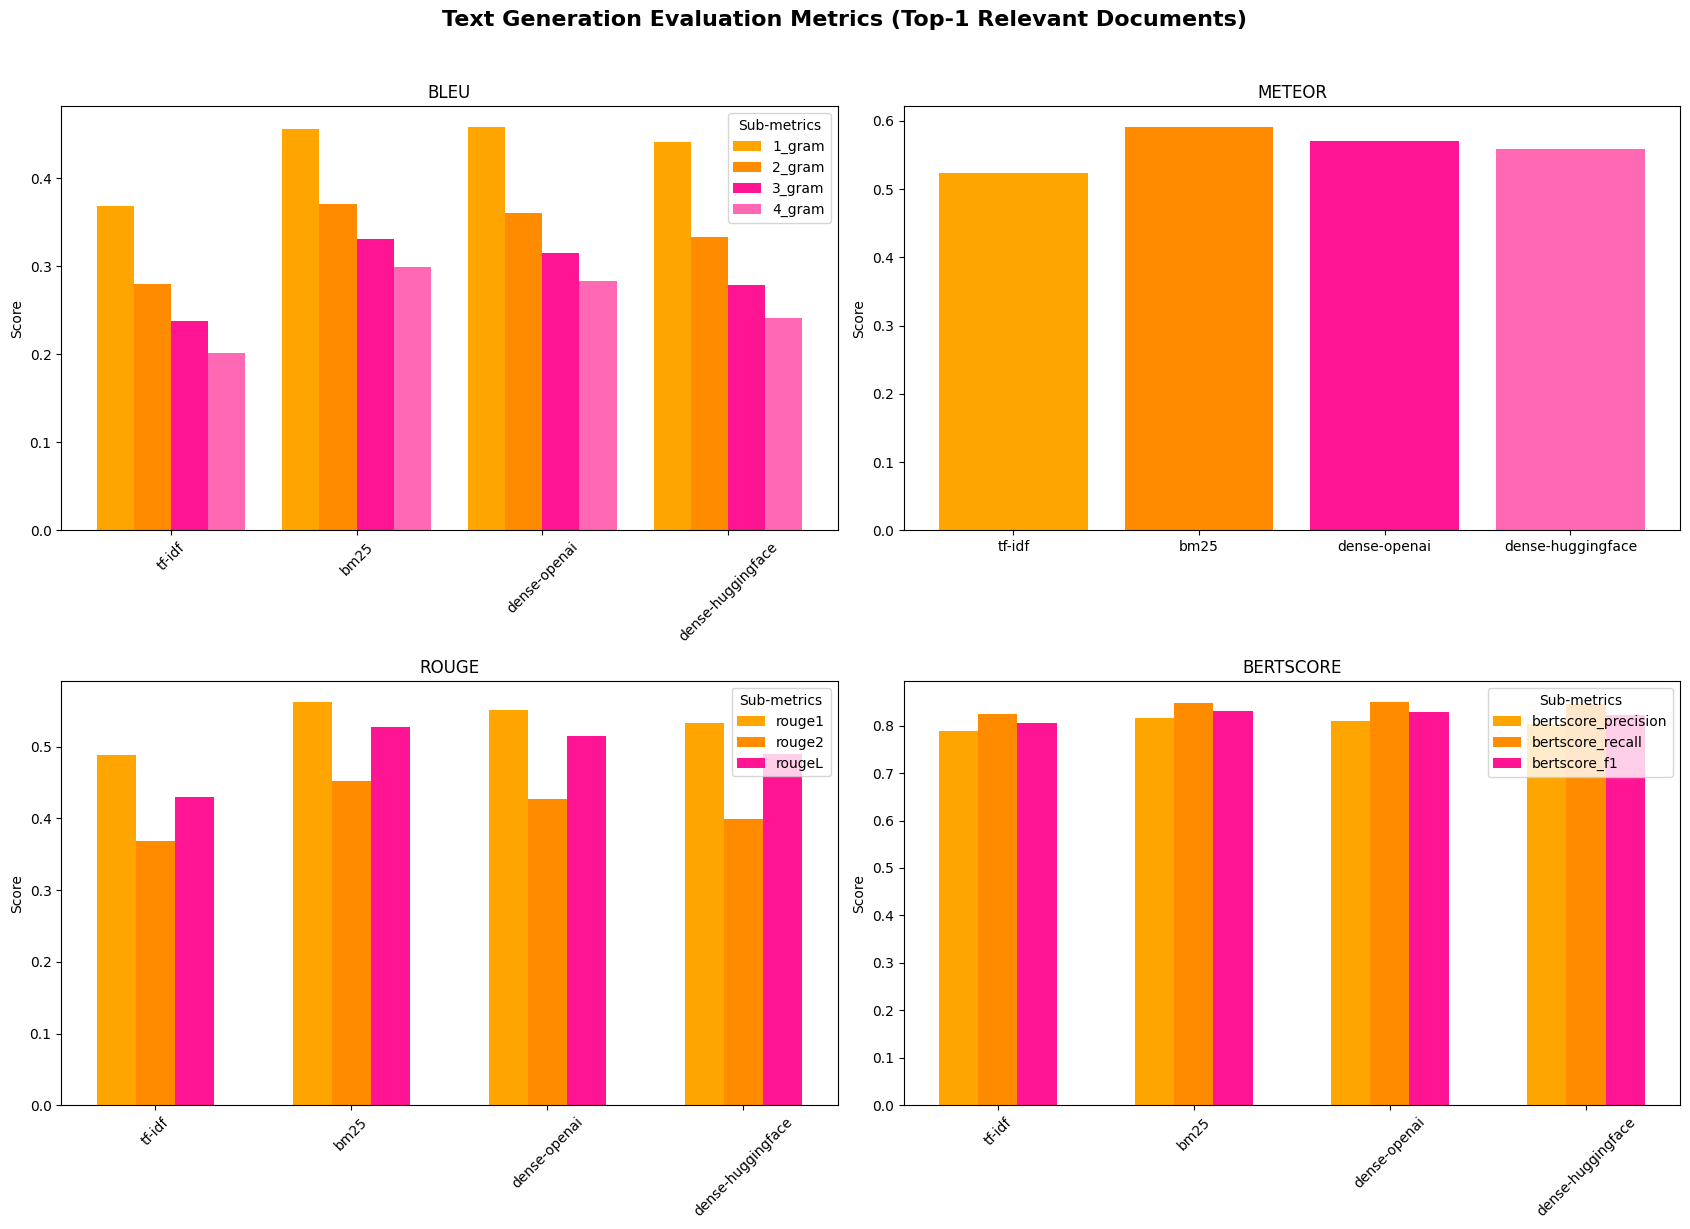

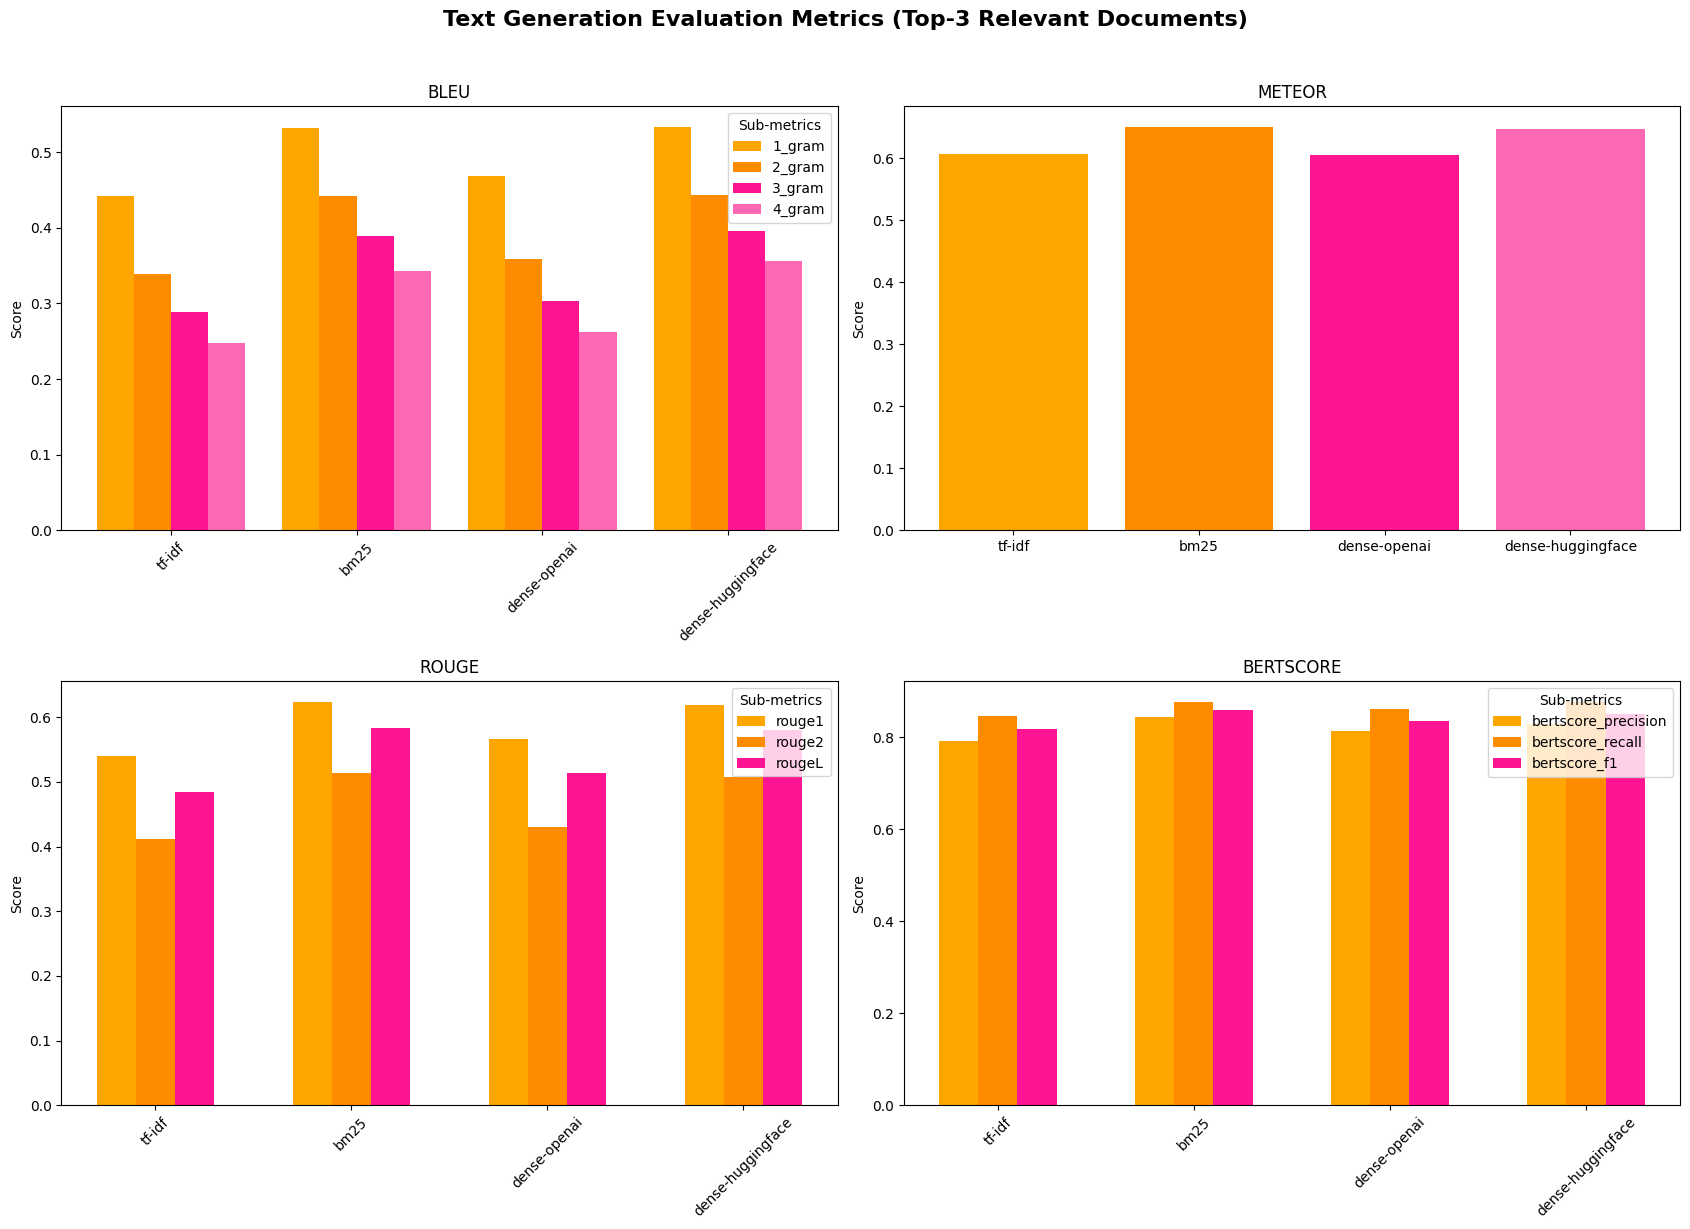

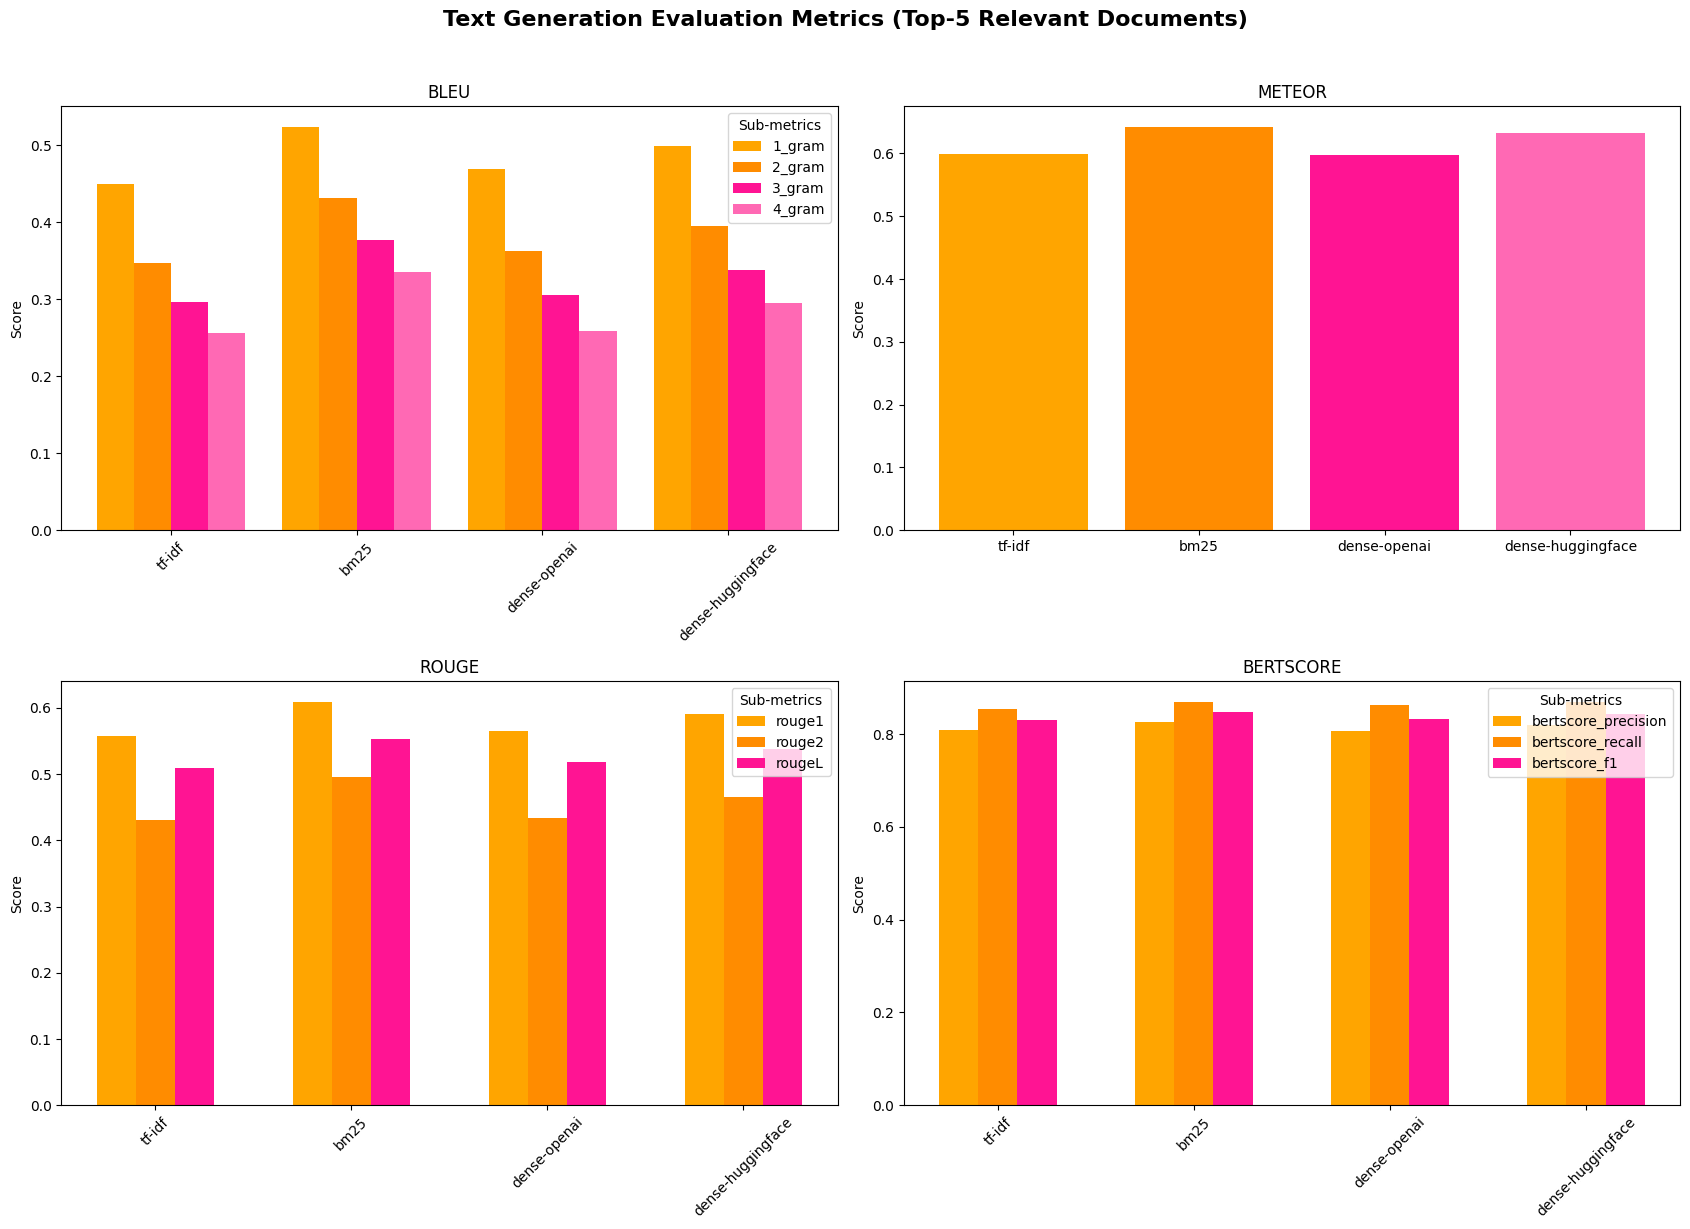

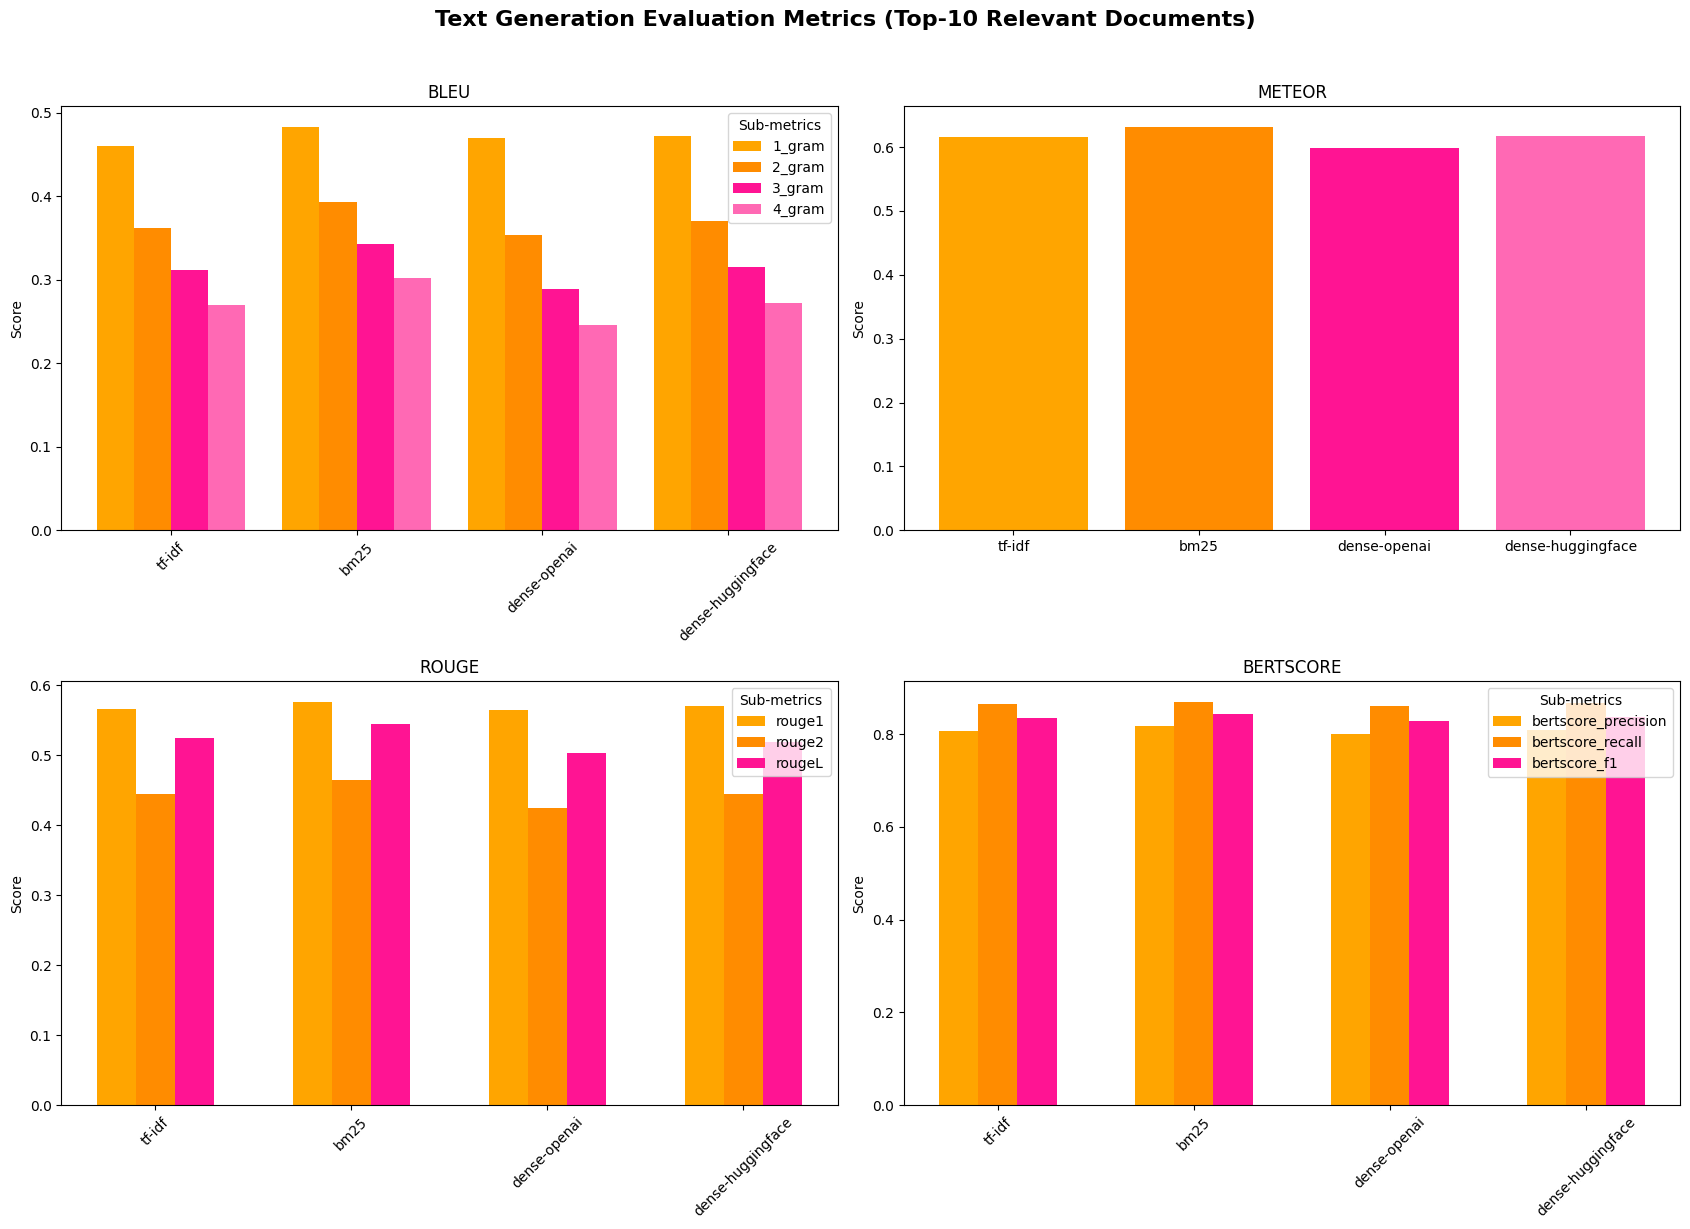

In [37]:
from matplotlib import pyplot as plt


for top_k, (results_dict, total_results_dict) in results_per_top_k.items():
    
    methods = list(results_dict.keys())
    metrics = ['bleu', 'meteor', 'rouge', 'bertscore']

    # Adjusting the plot to group by sub-metrics for each method
    fig, axs = plt.subplots(2, 2, figsize=(17, 12))
    axs = axs.flatten()

    # Colors for sub-metrics
    colors = ['orange', 'darkorange', 'deeppink', 'hotpink']

    for idx, metric in enumerate(metrics):
        ax = axs[idx]

        if isinstance(results_dict[methods[0]][metric], dict):  # If the metric has sub-metrics
            sub_metrics = list(results_dict[methods[0]][metric].keys())
            width = 0.2  # Bar width
            x = np.arange(len(methods))  # Methods along x-axis
            
            for i, sub_metric in enumerate(sub_metrics):
                values = [results_dict[method][metric][sub_metric] for method in methods]
                ax.bar(x + i * width, values, width, label=sub_metric, color=colors[i])
                
            ax.set_xticks(x + width * (len(sub_metrics) - 1) / 2)
            ax.set_xticklabels(methods, rotation=45)
            ax.set_title(metric.upper())
            ax.set_ylabel('Score')
            ax.legend(title='Sub-metrics')
            
        else:  # If the metric is not divided into sub-metrics (e.g., METEOR)
            values = [results_dict[method][metric] for method in methods]
            ax.bar(methods, values, color=colors[:len(methods)])
            ax.set_title(metric.upper())
            ax.set_ylabel('Score')
        

    plt.suptitle(f"Text Generation Evaluation Metrics (Top-{top_k} Relevant Documents)", fontsize=16, weight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

In [111]:
# # Load the evaluation results

# with open('results_per_tok_k.jsonl', 'r') as f:
#     results_per_top_k = json.load(f)

## Contexutal Retrieval

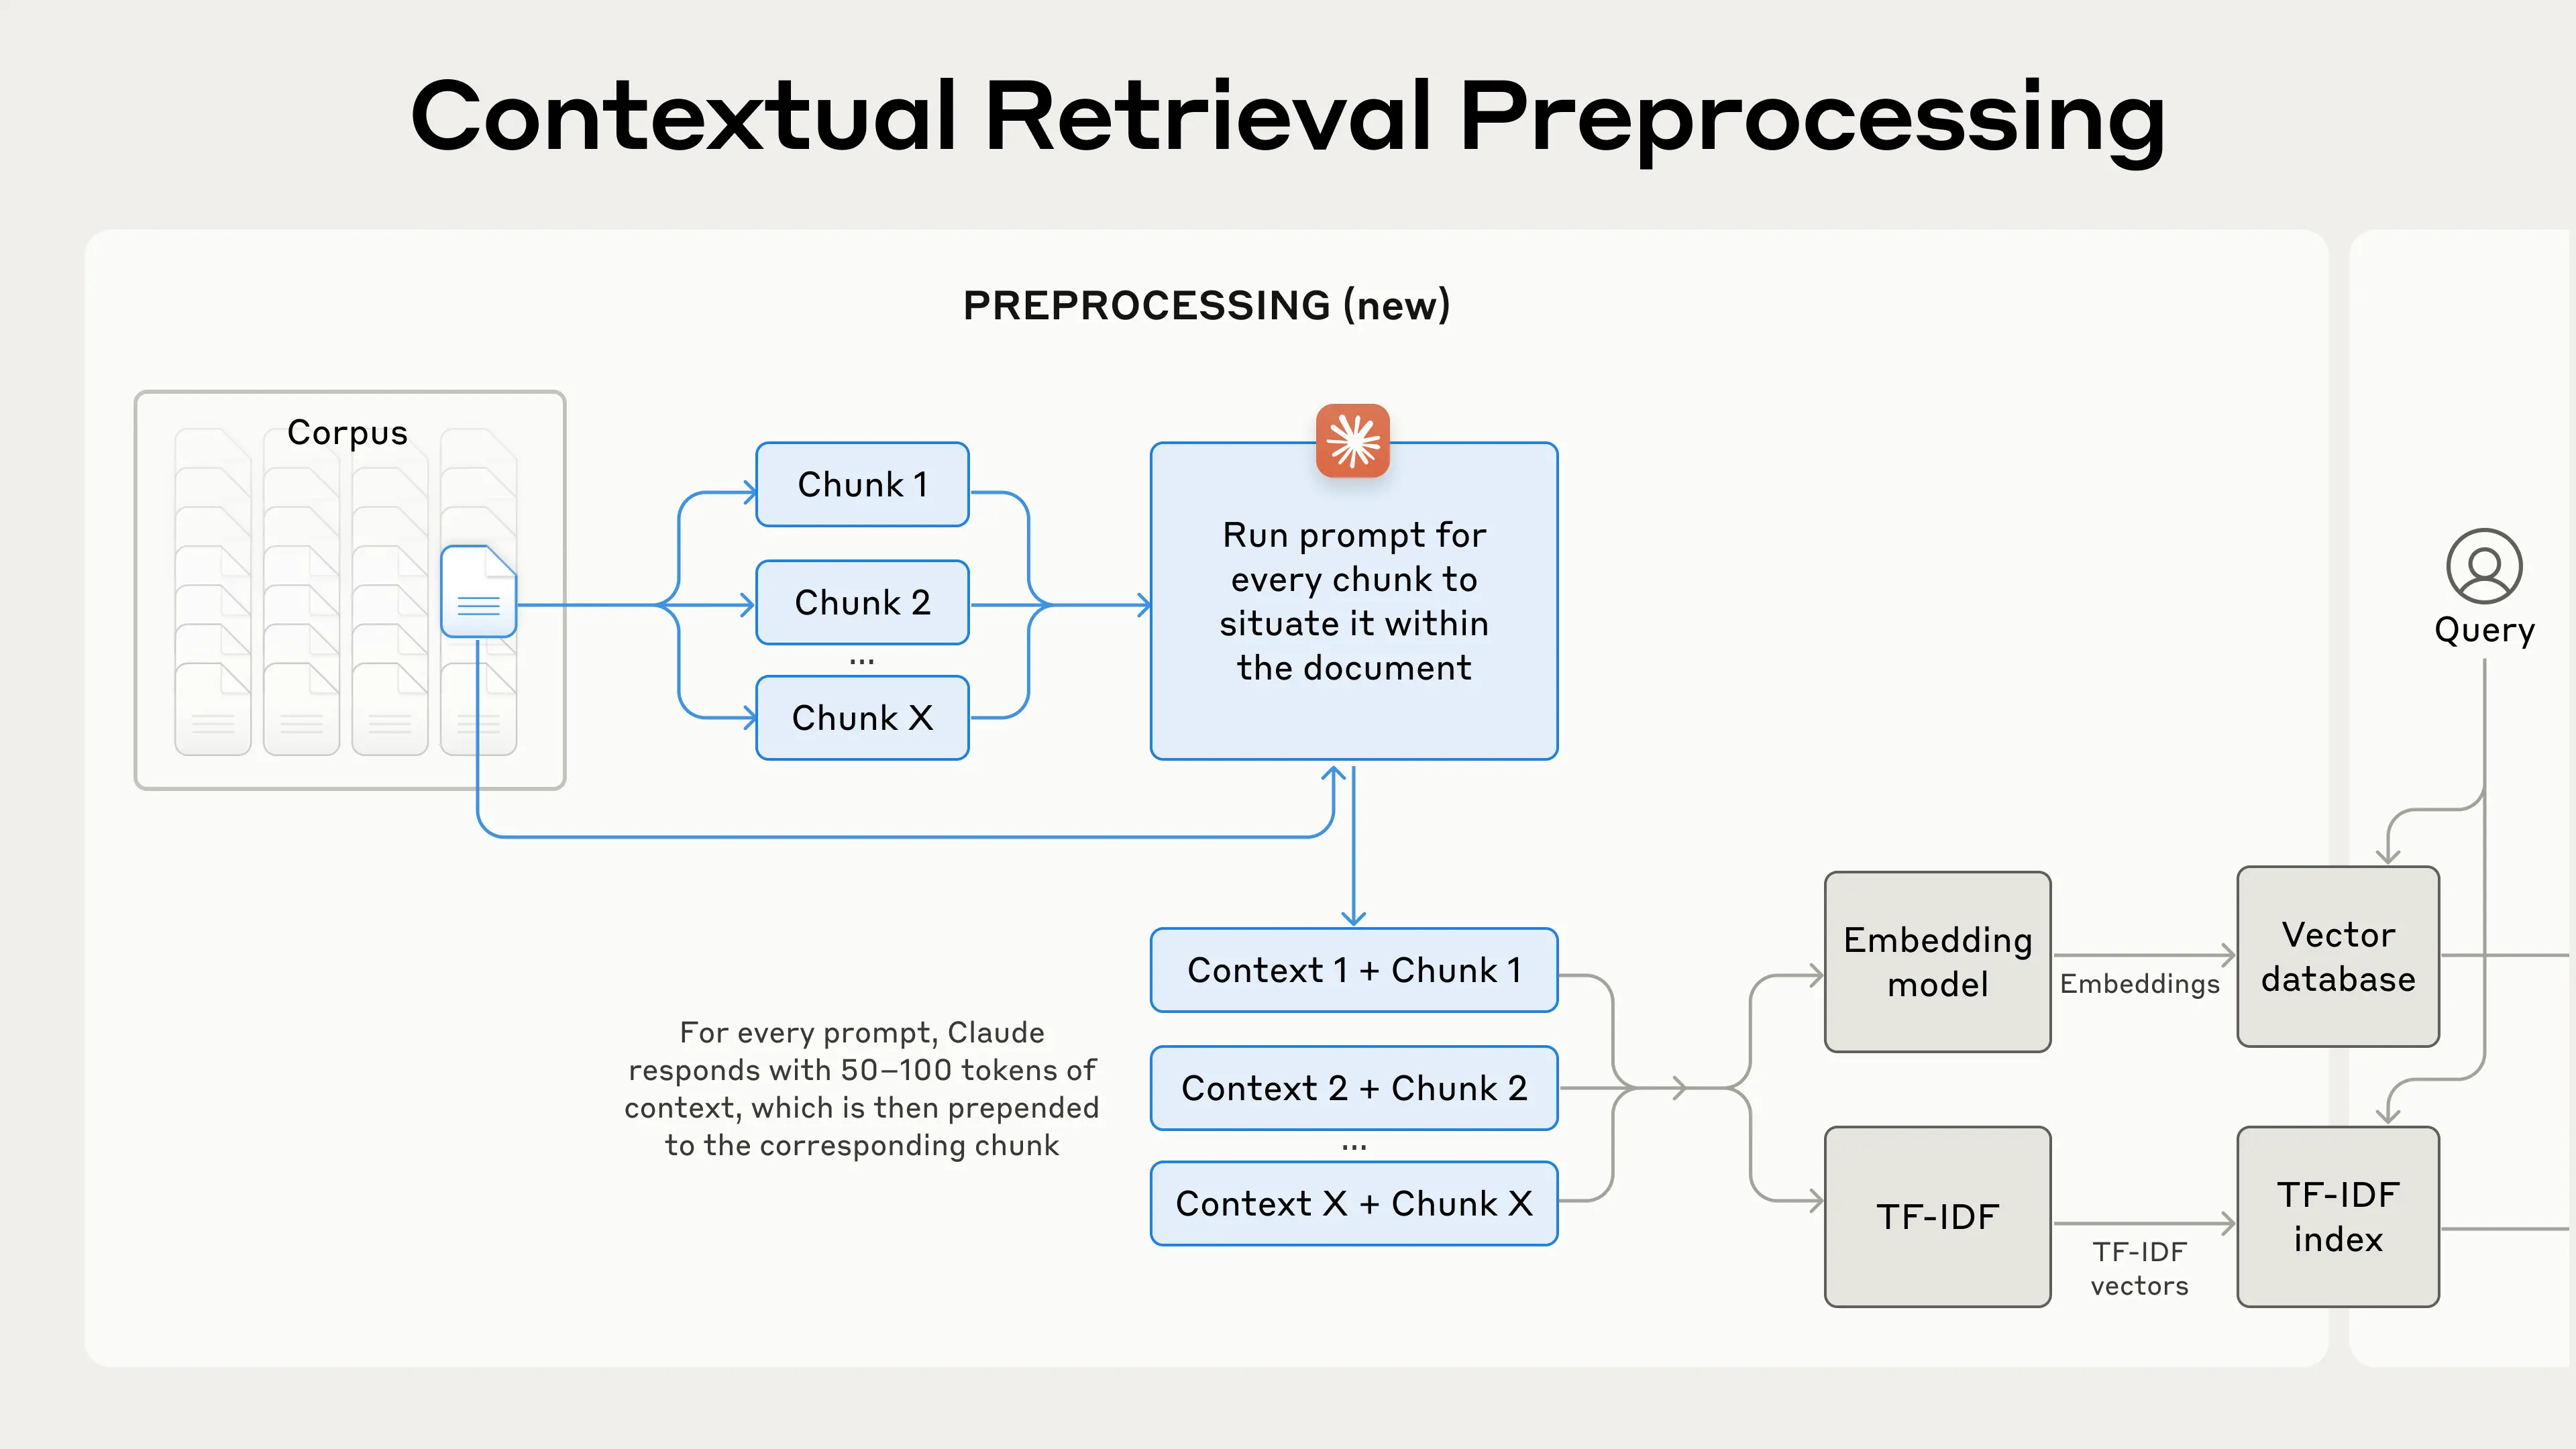

https://www.anthropic.com/news/contextual-retrieval

In [13]:
import pandas as pd
from langchain_openai import ChatOpenAI

In [14]:
import os
os.environ["OPENAI_API_KEY"] = "your-openai-api-key"

In [122]:
# Load the whole document and chunk dataframes
whole_doc_df = pd.read_parquet("./parse_project_dir/0.parquet")
chunk_df = pd.read_parquet("./chunk_project_dir/0.parquet")


# Create a whole document from the whole_doc_df
whole_document = "\n\n".join(whole_doc_df['texts'])

# Remove the file title from the chunk contents
chunk_df['contents'] = chunk_df['contents'].apply(lambda x: x.replace("파일 제목: 2023 한국 부자 보고서.pdf\n 내용: ", ""))

# Initialize the LLM
llm = ChatOpenAI(model="gpt-4o-mini")

def generate_context(row):
    prompt = f"""
    <document>
    {whole_document}
    </document>

    전체 문서에서 이 chunk를 적절한 위치에 배치하고자 합니다.

    <chunk>
    {row['contents']}
    </chunk>

    검색을 통한 chunk의 검색 효율성을 높이기 위해, 이 chunk가 전체 문서 내에서 들어갈 자리에 대한 간단하고 간결한 문맥을 제공해주세요. 문맥만 작성하고, 그 외에는 답하지 마세요.
    """
    prompt_ver_2 = f"""
    <document>
    {whole_document}
    </document>

    전체 문서에서 이 chunk를 적절한 위치에 배치하고자 합니다.

    <chunk>
    {row['contents']}
    </chunk>

    chunk의 검색 효율성을 높이기 위해, 이 chunk가 전체 문서 내에서 들어갈 자리에 대한 간단하고 간결한 문맥을 제공해주세요. 문맥만 작성하고, 그 외에는 답하지 마세요.
    문맥은 50~100 Token 사이로 작성해주세요.
    """

    # Generate the context using the LLM
    response = llm.invoke(prompt_ver_2)
    return response.content

In [123]:
# Load chunk_df

chunk_df = pd.read_parquet("./chunk_project_dir/0.parquet")

chunk_df.head()

,doc_id,contents,path,start_end_idx,metadata
0,2e853192-c470-4df1-bf48-ad4a0700be53,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 2023 한국 부자 보고서...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
1,e5325d5b-7eaa-4756-a936-8fccbc5f0c50,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 부의 원천 중 사업소득 은...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
2,e15bb808-f651-48c3-972f-ad88d2ee6eab,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 2011년 첫 보고서를 시...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
3,a4caa0df-ef99-4f63-909e-128ac6783e54,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 한국 부자 현황 ■ 202...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
4,9b3c074f-3cfb-4f96-aea4-ebdf8bea9725,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 한국 부자의 70.6% 인...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."


In [124]:
tqdm.pandas()

# Generate the context for each chunk
chunk_df['context'] = chunk_df.progress_apply(generate_context, axis=1)

# 문맥이 추가된 데이터프레임 반환
chunk_df

100%|██████████| 220/220 [55:03<00:00, 15.02s/it]


,doc_id,contents,path,start_end_idx,metadata,context
0,2e853192-c470-4df1-bf48-ad4a0700be53,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 2023 한국 부자 보고서...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...","이 chunk는 2023 한국 부자 보고서의 서두에 해당하는 부분으로, 부자 가구의..."
1,e5325d5b-7eaa-4756-a936-8fccbc5f0c50,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 부의 원천 중 사업소득 은...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...","이 보고서에서는 한국 부자의 자산 구성과 투자 성향에 대해 다루고 있으며, 특히 부..."
2,e15bb808-f651-48c3-972f-ad88d2ee6eab,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 2011년 첫 보고서를 시...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...","이 보고서는 한국 부자의 현황과 투자 행태를 분석하며, 부자들의 자산 관리 노하우를..."
3,a4caa0df-ef99-4f63-909e-128ac6783e54,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 한국 부자 현황 ■ 202...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...","이 chunk는 ""한국 부자 현황"" 섹션에 적절하게 배치될 수 있습니다. 이 섹션에..."
4,9b3c074f-3cfb-4f96-aea4-ebdf8bea9725,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 한국 부자의 70.6% 인...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...","이 문서의 중간 부분에 적절하게 배치될 수 있는 내용으로, 한국 부자의 거주 지역 ..."
...,...,...,...,...,...,...
215,298d209b-2f6b-45c1-b052-f0f406fe745c,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: New Findings T...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...",투자자산유형별 부자의 자산관리 이슈를 다루는 본 장에서는 부자의 자산을 어떻게 분류...
216,335acd4f-8dfc-4fa8-b4a7-d2de6473bb75,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: [ 참고] 01 I 용어 ...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...","이 보고서는 한국 부자의 현황과 투자 행태, 자산 관리 등을 다루고 있으며, 마지막..."
217,4aaca059-b2b1-4910-a306-659b2dca13f4,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 참고 1 용어정의 ● 한국...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...","이 보고서에서는 한국 부자의 자산 관리와 투자 행태를 분석하며, 다양한 부자 유형을..."
218,a57c20cf-477c-4b9e-ab78-3a9814ef40b2,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: ● 부동산자산 유형 - 거...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...","이 chunk는 문서의 ""참고1 용어 정의"" 섹션에 적절하게 배치될 수 있습니다. ..."


In [127]:
# # save the chunk_df with context (ver_2)
# chunk_df.to_parquet("chunk_project_dir/0_with_context_ver2.parquet")

In [128]:
import tiktoken
tokenizer = tiktoken.encoding_for_model("gpt-4o-mini")

chunk_df_v2 = pd.read_parquet("chunk_project_dir/0_with_context_ver2.parquet")
chunk_df_v2.apply(lambda x: len(tokenizer.encode(x['context'])), axis=1).describe()

count    220.000000
mean     107.995455
std       13.930518
min       67.000000
25%       99.000000
50%      107.000000
75%      116.250000
max      161.000000
dtype: float64

In [25]:
# # save the chunk_df with context
# chunk_df.to_parquet("chunk_project_dir/0_with_context.parquet")

In [118]:
# load the chunk_df with context
chunk_df = pd.read_parquet("chunk_project_dir/0_with_context.parquet")
chunk_df

,doc_id,contents,path,start_end_idx,metadata,context
0,2e853192-c470-4df1-bf48-ad4a0700be53,2023 한국 부자 보고서 Snapshot 부자 가구의 총자산은 부동산자산 56.2...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...","이 chunk는 ""2023 한국 부자 보고서""의 서두 부분에 적합하게 삽입되어, 보..."
1,e5325d5b-7eaa-4756-a936-8fccbc5f0c50,"부의 원천 중 사업소득 은 전년 대비 감소, 반면 상속/ 증여 는 전년 대비 증가 ...",./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...",이 chunk는 '한국 부자의 투자 행태' 섹션 내에서 부의 원천과 관련된 데이터 ...
2,e15bb808-f651-48c3-972f-ad88d2ee6eab,2011년 첫 보고서를 시작으로 올해 13 번째 발간되는 「2023 년 한국 부자 ...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...","이 chunk는 ""2023 한국 부자 보고서""의 서문이나 소개 부분에 적합합니다. ..."
3,a4caa0df-ef99-4f63-909e-128ac6783e54,"한국 부자 현황 ■ 2023년 한국 부자 수는 45만 6천 명, 보유한 총금융자산은...",./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...","이 chunk는 ""한국 부자 현황"" 섹션에 적합하며, 보고서의 서두에서 한국 부자의..."
4,9b3c074f-3cfb-4f96-aea4-ebdf8bea9725,"한국 부자의 70.6% 인 32만 2천 2백 명이 서울, 경기, 인천을 포함한 ‘ ...",./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...",한국 부자의 거주 지역과 부의 집중도를 분석하는 섹션에 적합한 위치에 이 chunk...
...,...,...,...,...,...,...
215,298d209b-2f6b-45c1-b052-f0f406fe745c,New Findings Top 5 투자자산유형별 부자는 투자에 활용할 수 있는 자산...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...","이 문서에서는 한국 부자의 현황과 투자 행태, 자산 관리 방법 등에 대해 다루고 있..."
216,335acd4f-8dfc-4fa8-b4a7-d2de6473bb75,[ 참고] 01 I 용어 정의 02 I 연구 방법,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...","이 문서는 한국 부자의 현황, 투자 행태, 미래 투자 전략 및 부의 생애에 대한 분..."
217,4aaca059-b2b1-4910-a306-659b2dca13f4,참고 1 용어정의 ● 한국 부자 : 금융자산 10억원 이상 보유하고 거주용 주택을 ...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...","이 문서는 한국 부자의 현황과 투자 행태를 분석한 보고서로, 부자의 정의와 분류 기..."
218,a57c20cf-477c-4b9e-ab78-3a9814ef40b2,"● 부동산자산 유형 - 거주용 부동산 : 주택, 아파트, 빌라· 연립, 오피스텔 등...",./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page...","이 chunk는 ""참고1 용어 정의"" 섹션에서 사용될 수 있습니다. 이 섹션은 한국..."


In [119]:
import tiktoken
tokenizer = tiktoken.encoding_for_model("gpt-4o-mini")

chunk_df.apply(lambda x: len(tokenizer.encode(x['context'])), axis=1).describe()

count    220.000000
mean     111.818182
std       46.975692
min       59.000000
25%       91.000000
50%      104.000000
75%      119.000000
max      441.000000
dtype: float64

In [18]:
# # ver_1
# chunk_df = pd.read_parquet("chunk_project_dir/0_with_context.parquet")

# ver_2
chunk_df = pd.read_parquet("chunk_project_dir/0_with_context_ver2.parquet")
new_chunk_df = chunk_df.copy()
new_chunk_df['contents'] = new_chunk_df.apply(lambda x: x['contents'] + "\n\n" + x['context'], axis=1)
new_chunk_df.drop(columns=['context'], inplace=True)

new_chunk_df

,doc_id,contents,path,start_end_idx,metadata
0,2e853192-c470-4df1-bf48-ad4a0700be53,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 2023 한국 부자 보고서...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
1,e5325d5b-7eaa-4756-a936-8fccbc5f0c50,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 부의 원천 중 사업소득 은...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
2,e15bb808-f651-48c3-972f-ad88d2ee6eab,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 2011년 첫 보고서를 시...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
3,a4caa0df-ef99-4f63-909e-128ac6783e54,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 한국 부자 현황 ■ 202...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
4,9b3c074f-3cfb-4f96-aea4-ebdf8bea9725,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 한국 부자의 70.6% 인...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
...,...,...,...,...,...
215,298d209b-2f6b-45c1-b052-f0f406fe745c,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: New Findings T...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
216,335acd4f-8dfc-4fa8-b4a7-d2de6473bb75,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: [ 참고] 01 I 용어 ...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
217,4aaca059-b2b1-4910-a306-659b2dca13f4,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: 참고 1 용어정의 ● 한국...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."
218,a57c20cf-477c-4b9e-ab78-3a9814ef40b2,파일 제목: 2023 한국 부자 보고서.pdf\n 내용: ● 부동산자산 유형 - 거...,./2023 한국 부자 보고서.pdf,"[0, 0]","{'last_modified_datetime': '2024-11-16', 'page..."


In [83]:
# base_result
import json

with open("base_retriever_performance_results.json", "r") as f:
    base_results = json.load(f)

In [84]:
base_results

{'tf-idf': {'hit_rate': {'1': 0.3,
   '3': 0.5666666666666667,
   '5': 0.7,
   '10': 0.8},
  'mrr': {'1': 0.3,
   '3': 0.4277777777777778,
   '5': 0.4577777777777778,
   '10': 0.4736507936507936},
  'precision': {'1': 0.3,
   '3': 0.18888888888888883,
   '5': 0.14000000000000004,
   '10': 0.08000000000000003},
  'recall': {'1': 0.3, '3': 0.5666666666666667, '5': 0.7, '10': 0.8},
  'f1': {'1': 0.3,
   '3': 0.28333333333333327,
   '5': 0.2333333333333334,
   '10': 0.1454545454545455}},
 'bm25': {'hit_rate': {'1': 0.4666666666666667,
   '3': 0.7,
   '5': 0.7333333333333333,
   '10': 0.7333333333333333},
  'mrr': {'1': 0.4666666666666667,
   '3': 0.5722222222222222,
   '5': 0.5788888888888888,
   '10': 0.5788888888888888},
  'precision': {'1': 0.4666666666666667,
   '3': 0.23333333333333325,
   '5': 0.1466666666666667,
   '10': 0.07333333333333335},
  'recall': {'1': 0.4666666666666667,
   '3': 0.7,
   '5': 0.7333333333333333,
   '10': 0.7333333333333333},
  'f1': {'1': 0.4666666666666667,

In [19]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm
from collections import defaultdict

metric_types = ["hit_rate", "recall_precision_f1", "mrr"]
retrieval_methods = ["tf-idf", "bm25", "dense-openai", "dense-huggingface"]
top_k = [1, 3, 5, 10]

contextual_retriever_results_dict = defaultdict(dict)


for retrieval_method in tqdm(retrieval_methods, desc="Retrieval Methods", total=len(retrieval_methods), position=0):
    contextual_retriever_results_dict[retrieval_method] = {}
    metrics = RetrievalMetrics(retrieval_method=retrieval_method, df_docs=new_chunk_df) # Use the new_chunk_df with context
    for metric_type in tqdm(metric_types, desc="Metric Types", total=len(metric_types), position=1):
        contextual_retriever_results_dict[retrieval_method].update(metrics.evaluate(df_qa, metric_type, top_k))

Retrieval Methods:  50%|█████     | 2/4 [00:00<00:00,  5.19it/s]

Indexing documents using dense-openai...
Indexing completed.


Retrieval Methods:  75%|███████▌  | 3/4 [09:26<04:18, 258.79s/it]

CUDA is available.
Indexing documents using dense-huggingface...
Indexing completed.


Retrieval Methods: 100%|██████████| 4/4 [09:48<00:00, 147.00s/it]


In [23]:
def split_recall_precision_f1(results_dict):
    top_k = [1, 3, 5, 10]
    for key in results_dict.keys():
        results_dict[key]['precision'] = {str(k) : results_dict[key]['recall_precision_f1'][k][1] for k in top_k}
        results_dict[key]['recall'] = {str(k) : results_dict[key]['recall_precision_f1'][k][0] for k in top_k}
        results_dict[key]['f1'] = {str(k) : results_dict[key]['recall_precision_f1'][k][2] for k in top_k}
        results_dict[key].pop('recall_precision_f1')
    return results_dict

In [24]:
contextual_retriever_results_dict = split_recall_precision_f1(contextual_retriever_results_dict)

contextual_retriever_results_dict

defaultdict(dict,
            {'tf-idf': {'hit_rate': {1: 0.43333333333333335,
               3: 0.6,
               5: 0.6333333333333333,
               10: 0.8},
              'mrr': {1: 0.43333333333333335,
               3: 0.5055555555555555,
               5: 0.5122222222222222,
               10: 0.5392063492063492},
              'precision': {'1': 0.43333333333333335,
               '3': 0.19999999999999993,
               '5': 0.1266666666666667,
               '10': 0.08000000000000003},
              'recall': {'1': 0.43333333333333335,
               '3': 0.6,
               '5': 0.6333333333333333,
               '10': 0.8},
              'f1': {'1': 0.43333333333333335,
               '3': 0.29999999999999993,
               '5': 0.21111111111111114,
               '10': 0.1454545454545455}},
             'bm25': {'hit_rate': {1: 0.43333333333333335,
               3: 0.6,
               5: 0.7,
               10: 0.7666666666666667},
              'mrr': {1: 0.43333333

In [26]:
# # save the contextual_retriever_results_dict
# import json

# with open("ver2_contextual_retriever_performance_results.json", "w") as f:
#     json.dump(contextual_retriever_results_dict, f)

In [32]:
import json

# load the base_retriever_results_dict
with open("base_retriever_performance_results.json", "r") as f:
    base_retriever_results_dict = json.load(f)

# load the contextual_retriever_results_dict
with open("contextual_retriever_performance_results.json", "r") as f:
    contextual_retriever_results_dict = json.load(f)

# load the ver2_contextual_retriever_results_dict
with open("ver2_contextual_retriever_performance_results.json", "r") as f:
    ver2_contextual_retriever_results_dict = json.load(f)

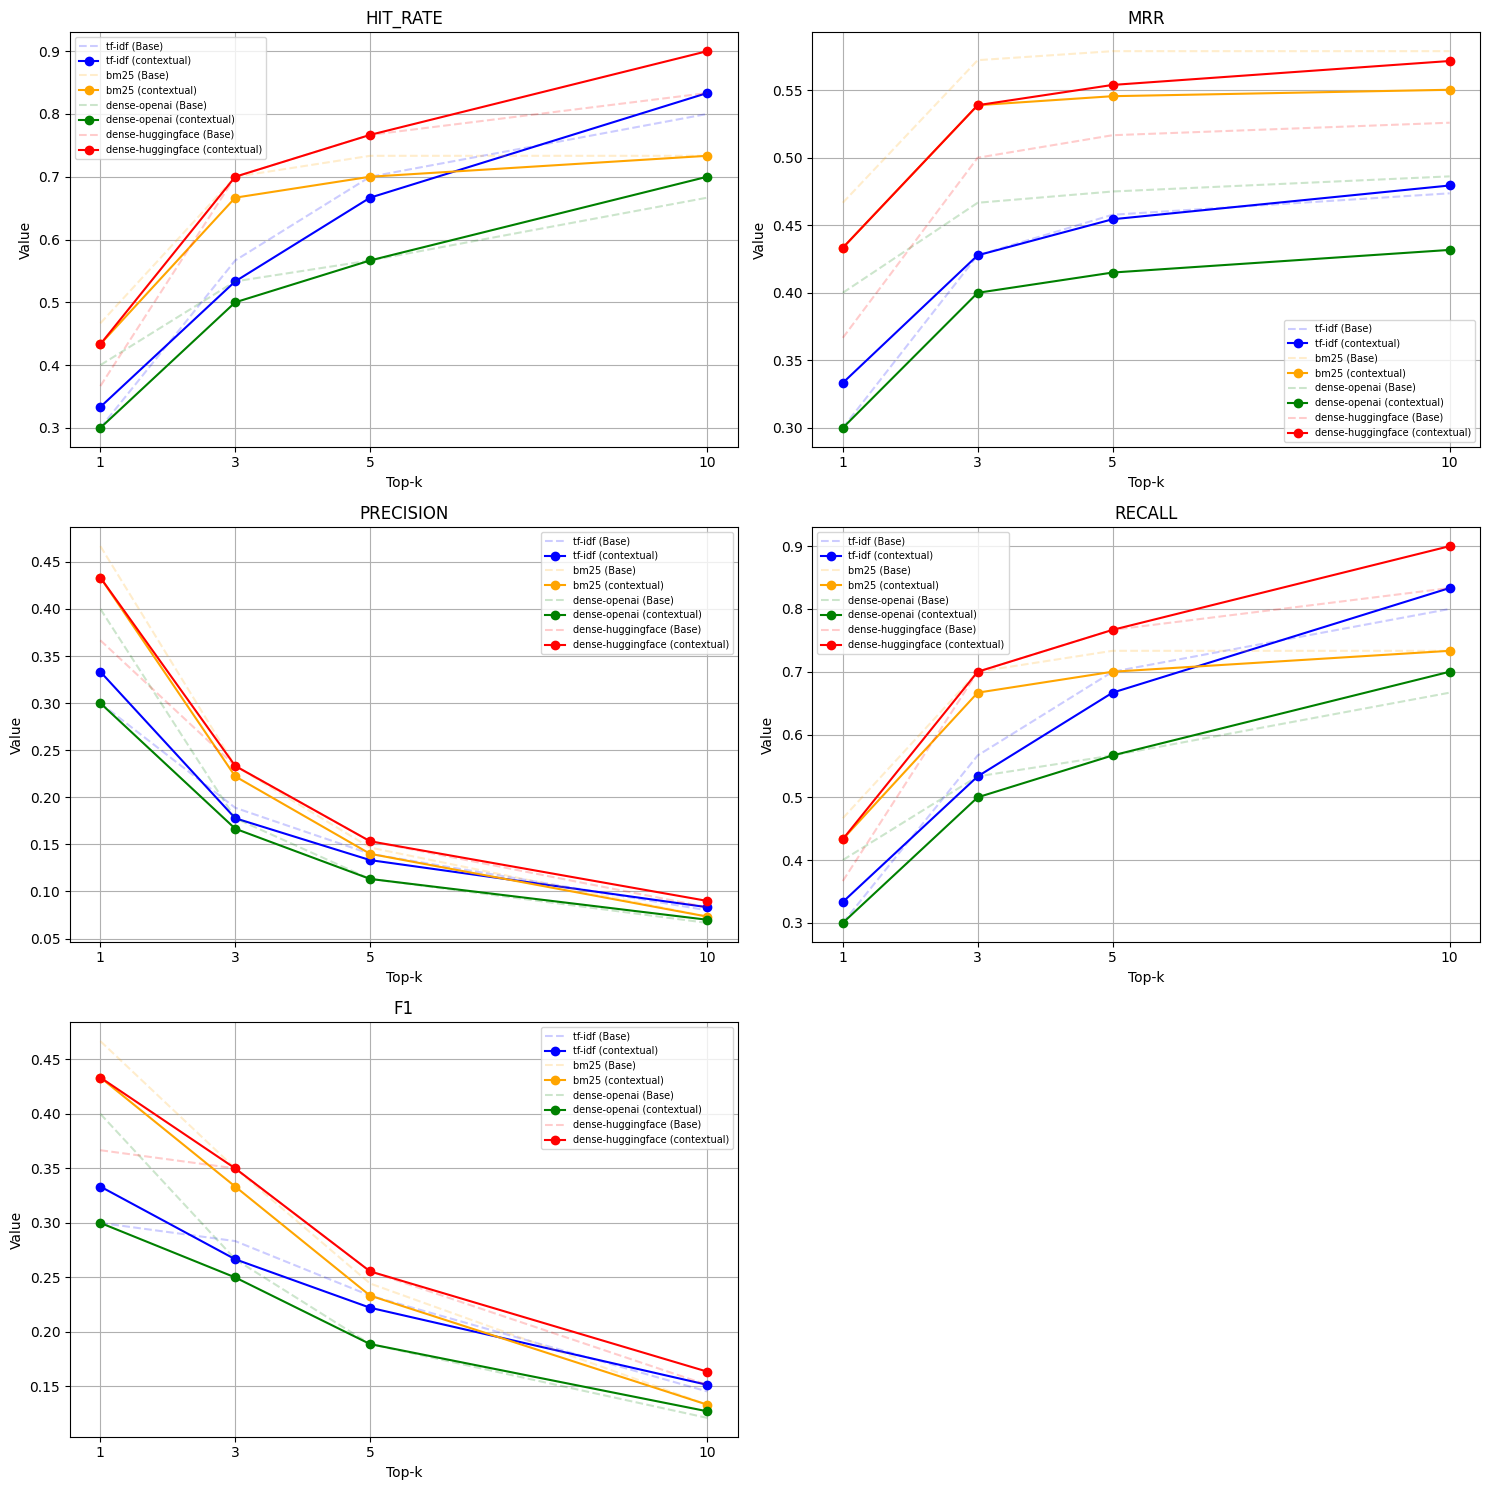

In [27]:
import matplotlib.pyplot as plt

metrics = ['hit_rate', 'mrr', 'precision', 'recall', 'f1']
methods = base_retriever_results_dict.keys()
x_values = list(map(int, base_retriever_results_dict['tf-idf']['hit_rate'].keys()))

colors = {'tf-idf': 'blue', 'bm25': 'orange', 'dense-openai': 'green', 'dense-huggingface': 'red'}

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    for method in methods:
        color = colors[method]
        y_base = list(base_retriever_results_dict[method][metric].values())
        ax.plot(x_values, y_base, linestyle='--', color=color, alpha=0.2, label=f"{method} (Base)")

        y_new = list(contextual_retriever_results_dict[method][metric].values())
        ax.plot(x_values, y_new, linestyle='-', color=color, marker='o', label=f"{method} (contextual)")

    ax.set_title(metric.upper())
    ax.set_xlabel('Top-k')
    ax.set_xticks(x_values)
    ax.set_ylabel('Value')
    ax.legend(fontsize=7)
    ax.grid(True)

axes[-1].axis('off')

plt.tight_layout()
plt.show()

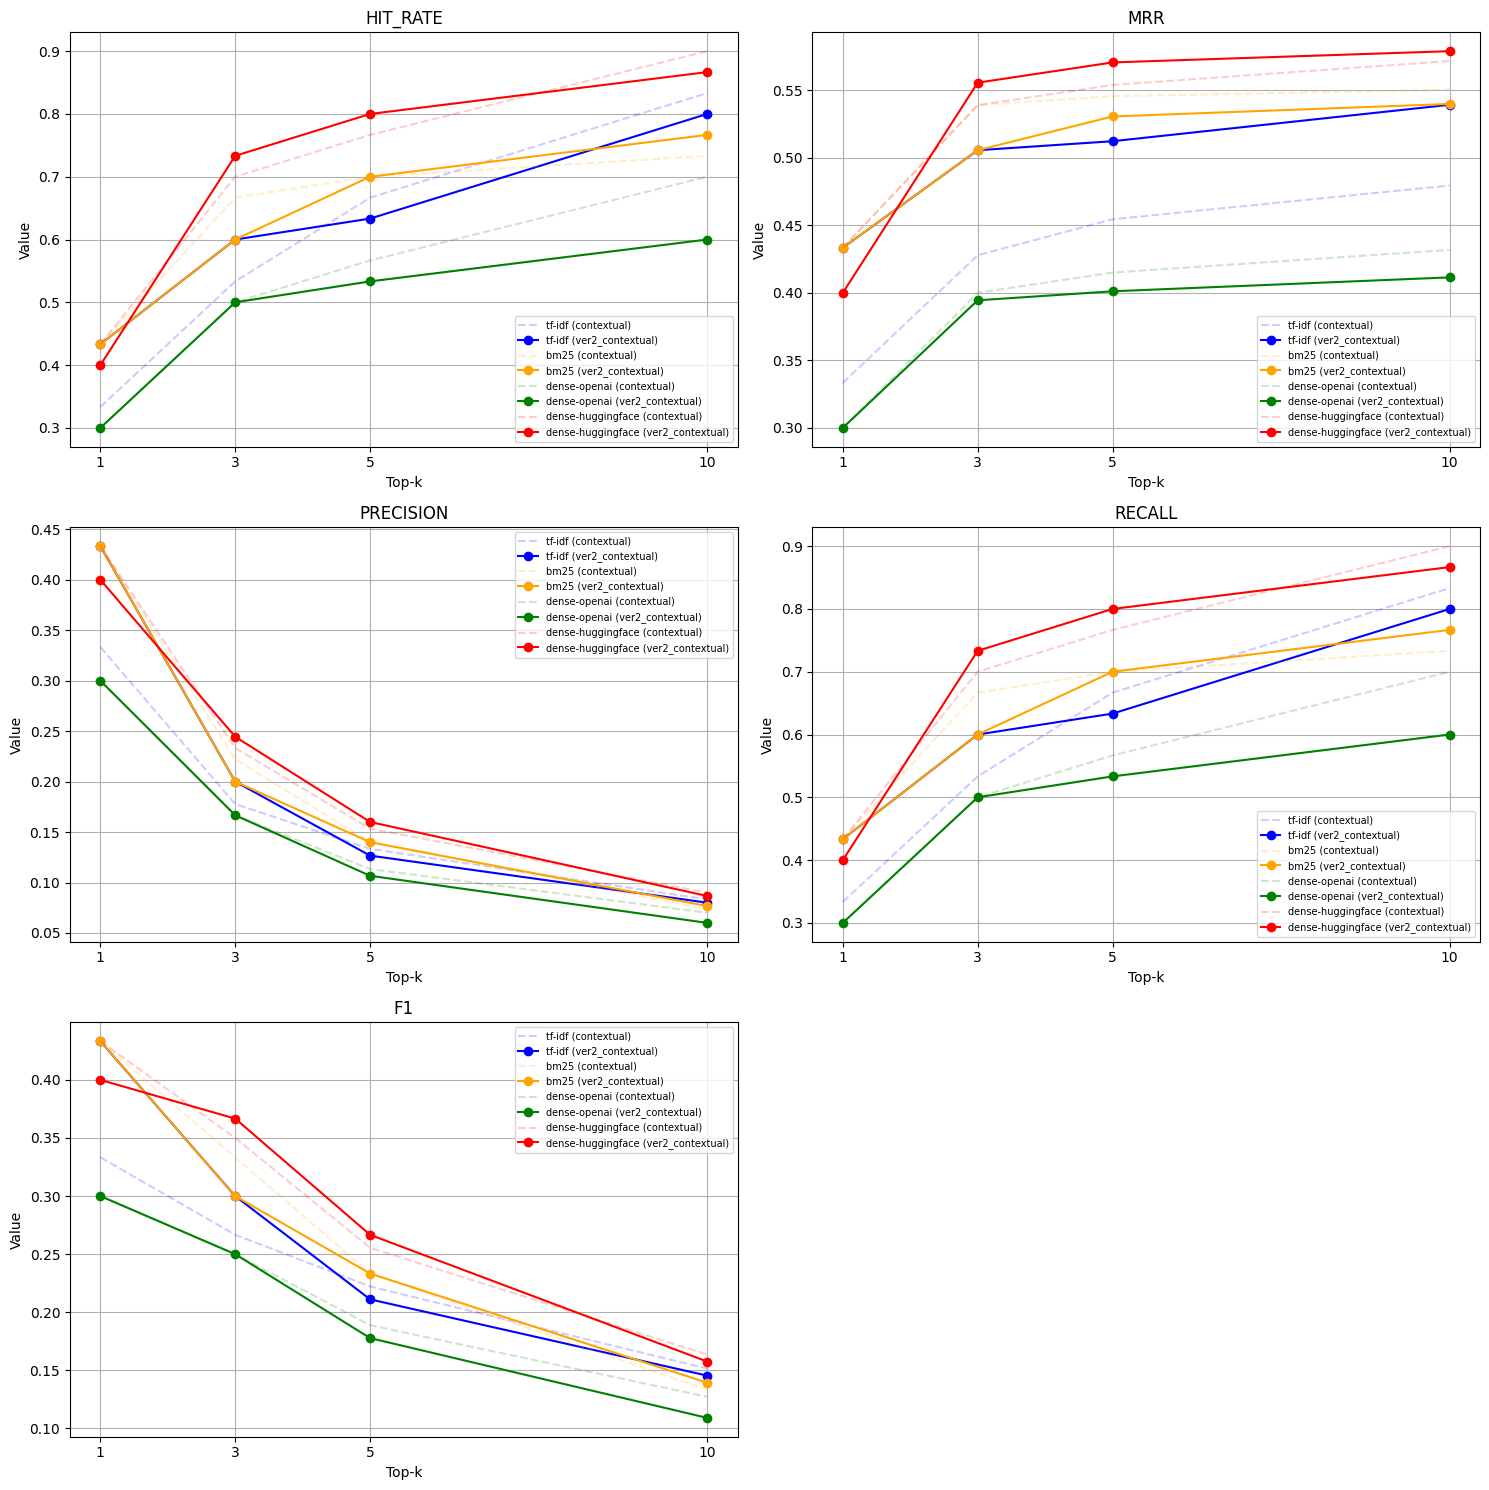

In [34]:
import matplotlib.pyplot as plt

metrics = ['hit_rate', 'mrr', 'precision', 'recall', 'f1']
methods = base_retriever_results_dict.keys()
x_values = list(map(int, base_retriever_results_dict['tf-idf']['hit_rate'].keys()))

colors = {'tf-idf': 'blue', 'bm25': 'orange', 'dense-openai': 'green', 'dense-huggingface': 'red'}

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    for method in methods:
        color = colors[method]
        y_base = list(contextual_retriever_results_dict[method][metric].values())
        ax.plot(x_values, y_base, linestyle='--', color=color, alpha=0.2, label=f"{method} (contextual)")

        y_new = list(ver2_contextual_retriever_results_dict[method][metric].values())
        ax.plot(x_values, y_new, linestyle='-', color=color, marker='o', label=f"{method} (ver2_contextual)")

    ax.set_title(metric.upper())
    ax.set_xlabel('Top-k')
    ax.set_xticks(x_values)
    ax.set_ylabel('Value')
    ax.legend(fontsize=7)
    ax.grid(True)

axes[-1].axis('off')

plt.tight_layout()
plt.show()